## Plots from X-ray absorption calculations using ORCA

In [6]:
import numpy as np
import pandas as pd
import csv as csv

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors
from matplotlib.colors import  ListedColormap
from matplotlib.pyplot import figure

In [8]:
from __future__ import print_function
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import math

In [9]:
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
from scipy.signal import find_peaks

--------------

### Functions list

In [10]:
list_suf = [i for i in range(25,81)] #temporary list asigned in the following two functions

In [11]:
def plot_xray(global_name, list_suf, x_arg, y_arg, label, xlmt=False, xmin=282, xmax=298, \
              scalec=False, ref_list=list_suf, \
              figsize=(16, 10), dpi=80, linestyle='-', marker='o', linewidth=1.3, markersize=1.3):
    """
    Function to plot a customize X-ray spectra (on development)
    global_name is the list of names for the different pd data frame
    list_suf is a list that contains the differentiable part of the global_name
    y_arg arx_arg and e the columns data to plot from pd data frame
    label is a list of labels for each plot
    
    Range of color fading away can be change by changing boleean value in scalec
    and setting ref_list with a list that contains the differentiable part of the
    global_name. if list_suf and ref_list are different, scale of color will be different
    (on revision)
    
    To define a new xrange to plot, it is convenient just to load specific ranges
    from the dataframe in global_name. Then, change xlmt to True and set the values
    as minimun (xmin) and maximum (xmax) in the x-axis of the plot.
    """
    
    #defining scale of colors to use in  the cmap selected   
    if scalec:
        colors=plt.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(ref_list)))
    else:
        colors=plt.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(list_suf)))
        
    fig = plt.figure(figsize=figsize, dpi=dpi)
    n1 = fig.add_subplot(111)
    cc=0
    if xlmt:
        for ii in list_suf:#using xmin and xmax as new range to plot data frames
            n1.plot(x_arg, y_arg, data=newxrange(global_name[cc], x_arg, xmin, xmax), \
                    linestyle=linestyle, marker=marker, linewidth=linewidth, \
                    markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
    else:
        for ii in list_suf:
            n1.plot(x_arg, y_arg, data=global_name[cc], linestyle=linestyle, marker=marker, \
                    linewidth=linewidth, markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
                
    plt.xlabel('Energy (eV)')
    plt.ylabel('Intensity (Oscillator strength)')
    plt.legend(loc='upper left');
    plt.show()

In [12]:
def plot_alot_xray(global_name, list_suf, x_arg, y_arg, xlmt=False, xmin=282, xmax=298, label=None, \
              scalec=False, ref_list=list_suf, plotsvg=False, nameplt='figure.svg',\
              xlbl='Energy (eV)', ylbl='Intensity (Oscillator strength)',\
              figsize=(16, 10), dpi=80, linestyle='-', marker='o', linewidth=1.3, markersize=1.3):
    """
    Function to plot a customize X-ray spectra (on development)
    global_name is the list of names for the different pd data frame
    list_suf is a list that contains the differentiable part of the global_name
    x_arg and y_arg are the columns data to plot from pd data frame
    label is a list of labels for each plot
    
    Range of color fading away can be change by changing boleean value in scalec
    and setting ref_list with a list that contains the differentiable part of the
    global_name. if list_suf and ref_list are different, scale of color will be different
    (on revision)
    
    To define a new xrange to plot, it is convenient just to load specific ranges
    from the dataframe in global_name. Then, change xlmt to True and set the values
    as minimun (xmin) and maximum (xmax) in the x-axis of the plot.
    """
    
    #defining scale of colors to use in  the cmap selected
    if scalec:
        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(ref_list)))
    else:
        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(list_suf)))
    if label==None:
        label=[]
        label=['_nolegend_' for ii in list_suf]

    fig = plt.figure(figsize=figsize, dpi=dpi)
    n1 = fig.add_subplot(111)
    cc=0
    if xlmt:
        for ii in list_suf:#using xmin and xmax as new range to plot data frames
            n1.plot(x_arg, y_arg, data=newxrange(global_name[cc], x_arg, xmin, xmax), \
                    linestyle=linestyle, marker=marker, linewidth=linewidth, \
                    markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1
    else:
        for ii in list_suf:
            n1.plot(x_arg, y_arg, data=global_name[cc], linestyle=linestyle, marker=marker, \
                    linewidth=linewidth, markersize=markersize, color=colors[cc], label=label[cc])
            cc+=1

    cmap = plt.get_cmap("coolwarm", len(list_suf))
    norm= matplotlib.colors.BoundaryNorm(np.linspace(0.05, 0.85, len(list_suf)),len(list_suf))

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ticks=np.arange(0,len(list_suf)), ax=[n1])

    
    plt.xlabel(xlbl)
    plt.ylabel(ylbl)
    #plt.legend(loc='upper left');
    plt.show()
    if plotsvg:
        fig.savefig(nameplt, format="svg")

In [13]:
np.arange(1,len(list_suf)+1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56])

In [14]:
def newxrange(data, col, minl, maxl):
    """
    this function crops a pd data frame
    """
    return data.loc[(data[col]>=minl) & (data[col]<=maxl)]

In [15]:
def getting_max_int(df, min_r, max_r):
    """
    giving a specific range of the data, this function returns the energy when intensity is maximum
    """
    num = df[(df['Energy']<max_r) & (df['Energy']>min_r)]['Intensity'].idxmax()
    try:
        return df.iloc[num][['Energy','Intensity']]
    except IndexError:
        return pd.DataFrame({'Energy': [NaN], 'Intensity': [NaN]})

____________________________________

### X-ray absorption spectra calculated using PNO-DFT/ROCIS zora

#### Pair amino acid interaction between Phenylalanine (F) and Tyrosine (Y)

##### System of study: Phe $---$Tyr (varying inter fragment distances)

### F$---$Y ( $n=2.5, 2.6, ..., 3.0, ..., 11.0 \overset{\circ}{A}$  )

##### Assigning intial variables

In [16]:
#Defining name for variables in the folder (outputs and inputs)
file=""
post=".csv"
suff="fy_"

In [17]:
#Defining variables
l_tmp = [85, 90, 95, 100, 105, 110]
list_suf = [i for i in range(25,81)]
for i in l_tmp:
    list_suf.append(i)

In [18]:
list_suf_resume = [25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,\
                   40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110]

#### Calling output files

In [19]:
for ii in list_suf:
    globals()['%s' % suff+str(ii)] = pd.read_csv(file+'AB_'+str(ii/10)+'A'+post, delimiter=',')
    globals()['%s' % suff+str(ii)].columns = ['Energy', 'Intensity', 'dx', 'dy', 'dz']

In [20]:
suff_num = 45
globals()['%s' % suff+str(suff_num)]

Energy  Intensity   dx   dy   dz
0     288.02        0.0  0.0  0.0  0.0
1     288.04        0.0  0.0  0.0  0.0
2     288.06        0.0  0.0  0.0  0.0
3     288.08        0.0  0.0  0.0  0.0
4     288.10        0.0  0.0  0.0  0.0
...      ...        ...  ...  ...  ...
2994  348.92        0.0  0.0  0.0  0.0
2995  348.94        0.0  0.0  0.0  0.0
2996  348.96        0.0  0.0  0.0  0.0
2997  348.98        0.0  0.0  0.0  0.0
2998  349.00        0.0  0.0  0.0  0.0

[2999 rows x 5 columns]

 _______________________________

# Plotting XAS

In [21]:
# uncomment to check the list or parameters of the plot
#plt.rcParams.keys()

In [22]:
plt.rcParams['axes.labelsize'] = 26
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['font.size'] = 18

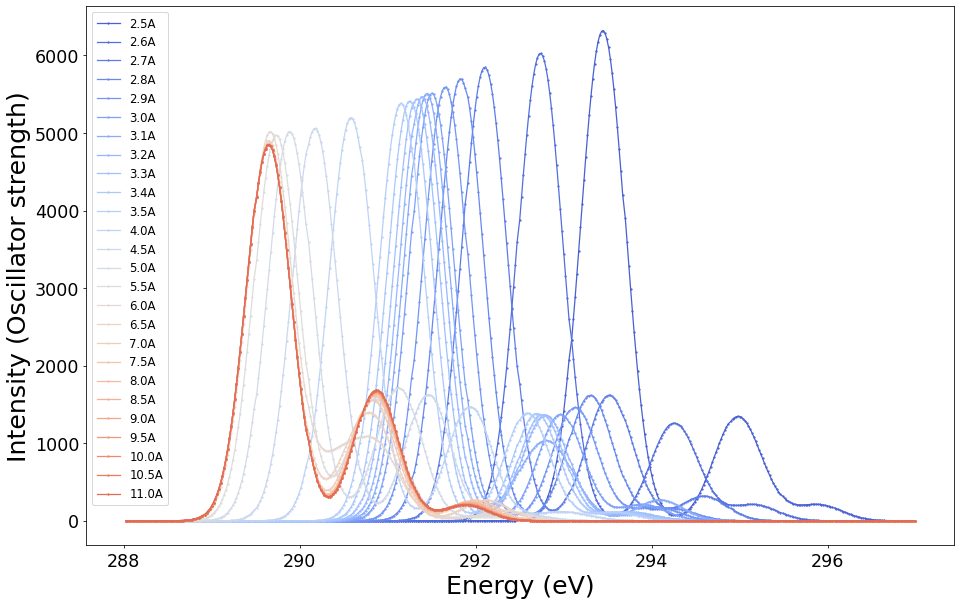

In [23]:
global_name = [globals()['%s' % suff+str(ii)] for ii in list_suf_resume] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_resume] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_resume, 'Energy', 'Intensity', label_name, dpi=70,\
         xlmt=True, xmin=288, xmax=297)

In [24]:
%%capture 
#uncomment %%capture to see the output
global_name = [globals()['%s' % suff+str(ii)] for ii in list_suf_resume] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_resume] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_resume, 'Energy', 'Intensity', label_name, dpi=70,\
         xlmt=True, xmin=299, xmax=304)

In [25]:
%%capture 
#uncomment %%capture to see the output
global_name = [globals()['%s' % suff+str(ii)] for ii in list_suf_resume] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf_resume] #creating list of label names from pd.data frame diff. names
plot_xray(global_name, list_suf_resume, 'Energy', 'Intensity', label_name, dpi=70,\
         xlmt=True, xmin=304, xmax=350)

In [26]:
name_plt1='predge_1stregion.svg'

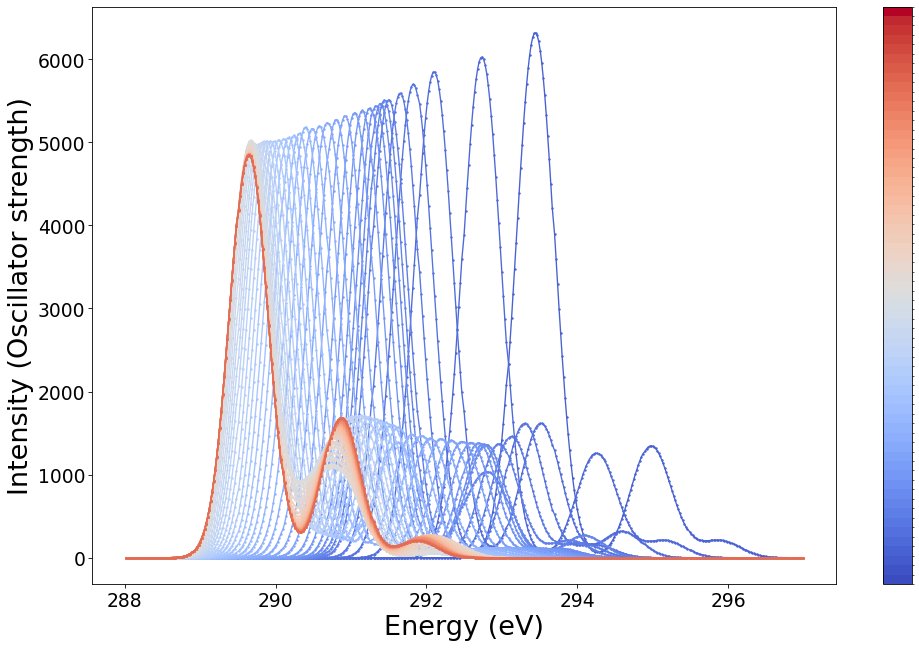

In [27]:
global_name = [globals()['%s' % suff+str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=75,\
         xlmt=True, xmin=288, xmax=297, label=label_name, plotsvg=True, nameplt=name_plt1)

In [28]:
name_plt2='predge_2ndregion.svg'

In [29]:
%%capture 
#uncomment %%capture to see the output
global_name = [globals()['%s' % suff+str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=75,\
         xlmt=True, xmin=299, xmax=304, plotsvg=True, nameplt=name_plt2)

In [30]:
name_plt3='predge_3rdregion.svg'

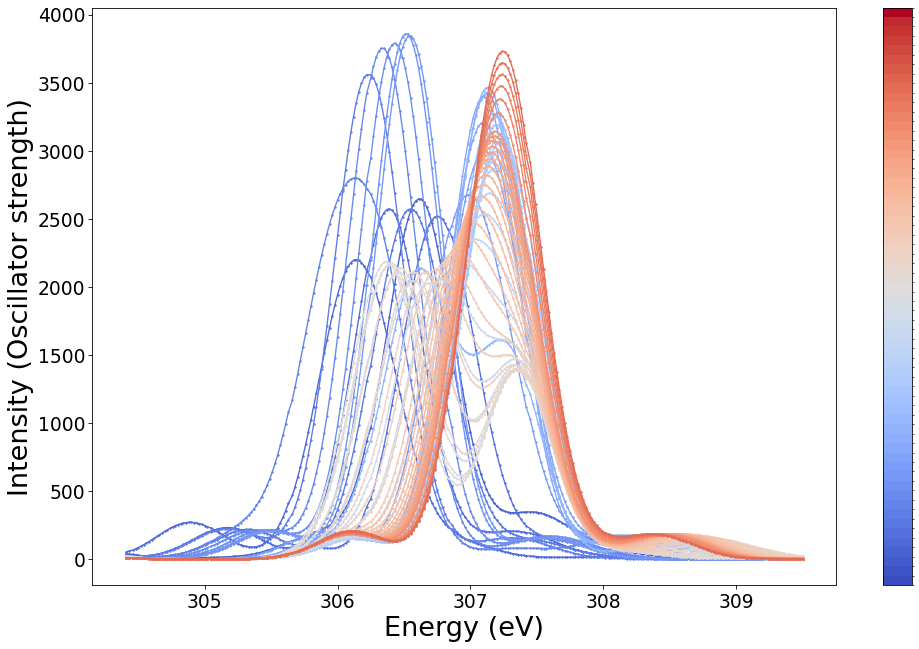

In [31]:
global_name = [globals()['%s' % suff+str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=75,\
         xlmt=True, xmin=304.4, xmax=309.5, plotsvg=True, nameplt=name_plt3)

In [32]:
name_plt4='predge_4thregion.svg'

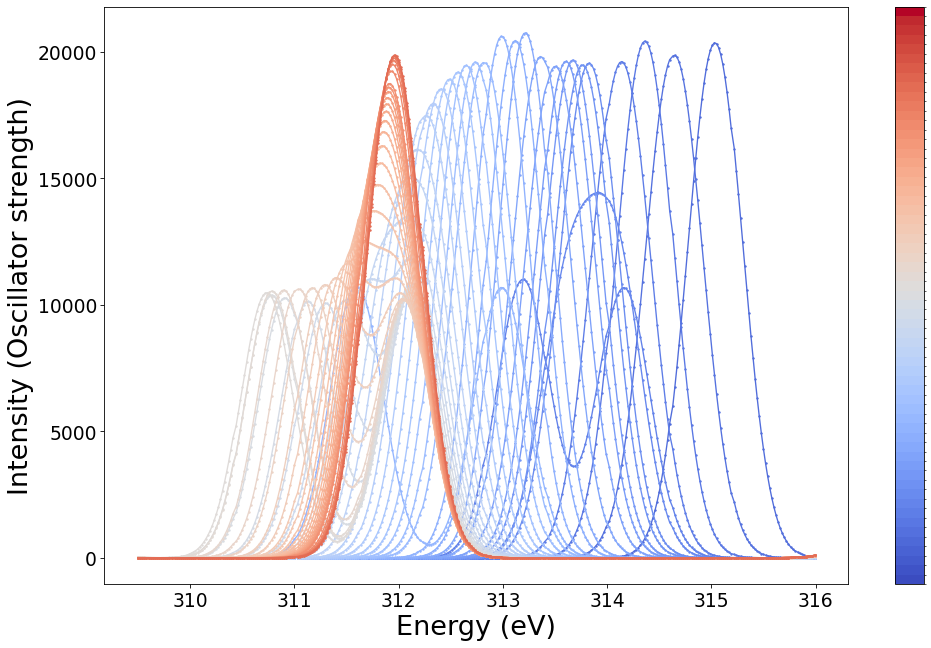

In [33]:
global_name = [globals()['%s' % suff+str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=75,\
         xlmt=True, xmin=309.5, xmax=316, plotsvg=True, nameplt=name_plt4)

In [34]:
name_plt5='predge_5thregion.svg'

In [35]:
%%capture 
#uncomment %%capture to see the output
global_name = [globals()['%s' % suff+str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=75,\
         xlmt=True, xmin=316, xmax=350, plotsvg=True, nameplt=name_plt5)

In [36]:
name_plt6='total_predge_regiontest.svg'

In [37]:
%%capture 
#uncomment %%capture to see the output
global_name = [globals()['%s' % suff+str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=60,\
         xlmt=True, xmin=288, xmax=304, plotsvg=True, nameplt=name_plt6)

In [38]:
name_plt7='total_predge_regiontest_si.svg'

In [39]:
%%capture
#uncomment %%capture to see the output
global_name = [globals()['%s' % suff+str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=60,\
         xlmt=True, xmin=288, xmax=350, plotsvg=True, nameplt=name_plt7)

________________________________________

## Variable analysis

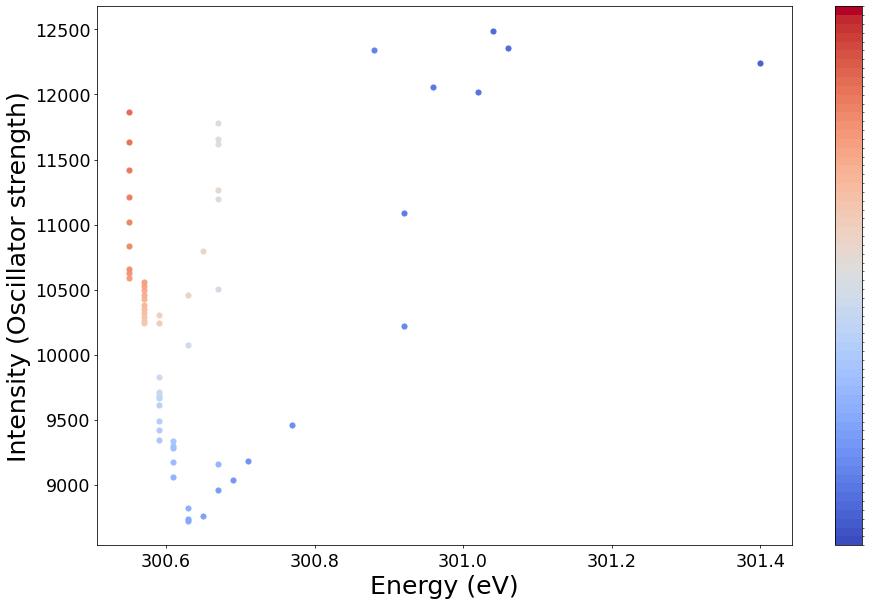

In [40]:
global_name_cut_1 = [getting_max_int(globals()['%s' % suff+str(ii)], 297, 304) \
               for ii in list_suf]
label_name = [str(ii/10)+'A' for ii in list_suf]
plot_alot_xray(global_name_cut_1, list_suf, 'Energy', 'Intensity', dpi=70, markersize=5.3)
# xlmt=True, xmin=288.5, xmax=296)

In [41]:
l_tmp = [85, 90, 95, 100, 105, 110]
list_suf = [i for i in range(25,81)]
for i in l_tmp:
    list_suf.append(i)

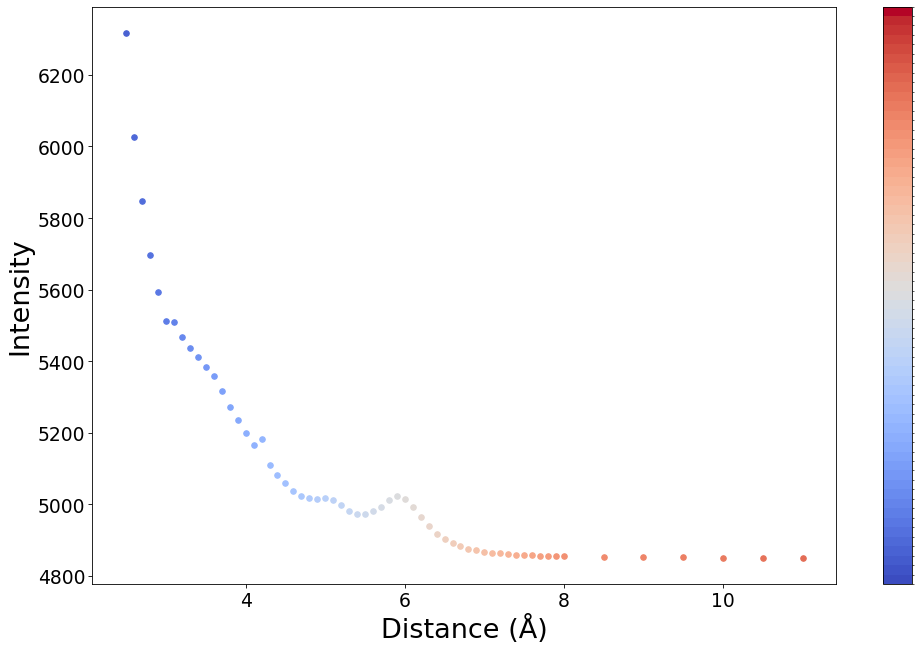

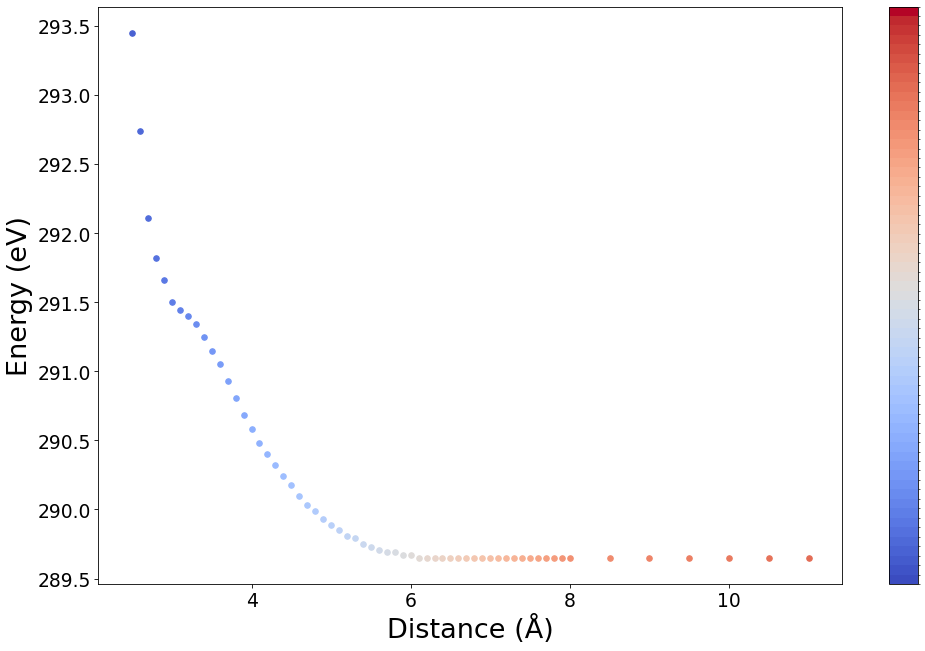

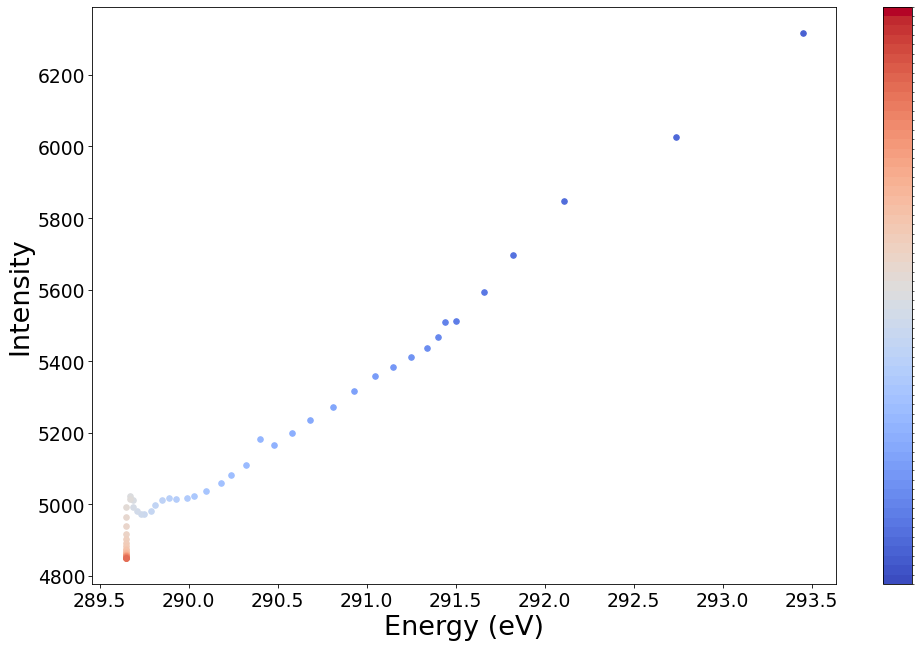

In [42]:
global_name_cut_1 = [getting_max_int(globals()['%s' % suff+str(ii)], 288, 297) \
               for ii in list_suf]
new_df_i = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
  'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})
 #'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})
new_df_e = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
 #'Energy': [1/math.exp(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})
#new_df_ei = pd.DataFrame({'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) \
new_df_ei = pd.DataFrame({'Intensity': [global_name_cut_1[cc]['Intensity'] \
                                        for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})

neww_df_i = [new_df_i.iloc[ii] for ii in range(len(list_suf))]
neww_df_e = [new_df_e.iloc[ii] for ii in range(len(list_suf))]
neww_df_ei = [new_df_ei.iloc[ii] for ii in range(len(list_suf))]

label_name = [str(ii/10)+'A' for ii in list_suf]

plot_alot_xray(neww_df_i, list_suf, 'Distance', 'Intensity', dpi=75, markersize=5.3,\
              xlbl='Distance (Å)', ylbl='Intensity') #nameplt='Ivsdist_predge_region1pt.svg')
plot_alot_xray(neww_df_e, list_suf, 'Distance', 'Energy', dpi=75, markersize=5.3,\
              xlbl='Distance (Å)', ylbl='Energy (eV)')
plot_alot_xray(neww_df_ei, list_suf, 'Energy', 'Intensity', dpi=75, markersize=5.3,\
              xlbl='Energy (eV)', ylbl='Intensity')

In [43]:
ppr_plot3 = pd.DataFrame({'Distance': [ii/10 for ii in list_suf],\
                               'Intensity': [i['Intensity'] for i in neww_df_i],\
                               'Energy': [i['Energy'] for i in neww_df_e],\
                              })

In [44]:
ppr_plot3[5:56].loc[:,["Distance"]].T.values[0]

array([3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2,
       4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5,
       5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
       6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. ])

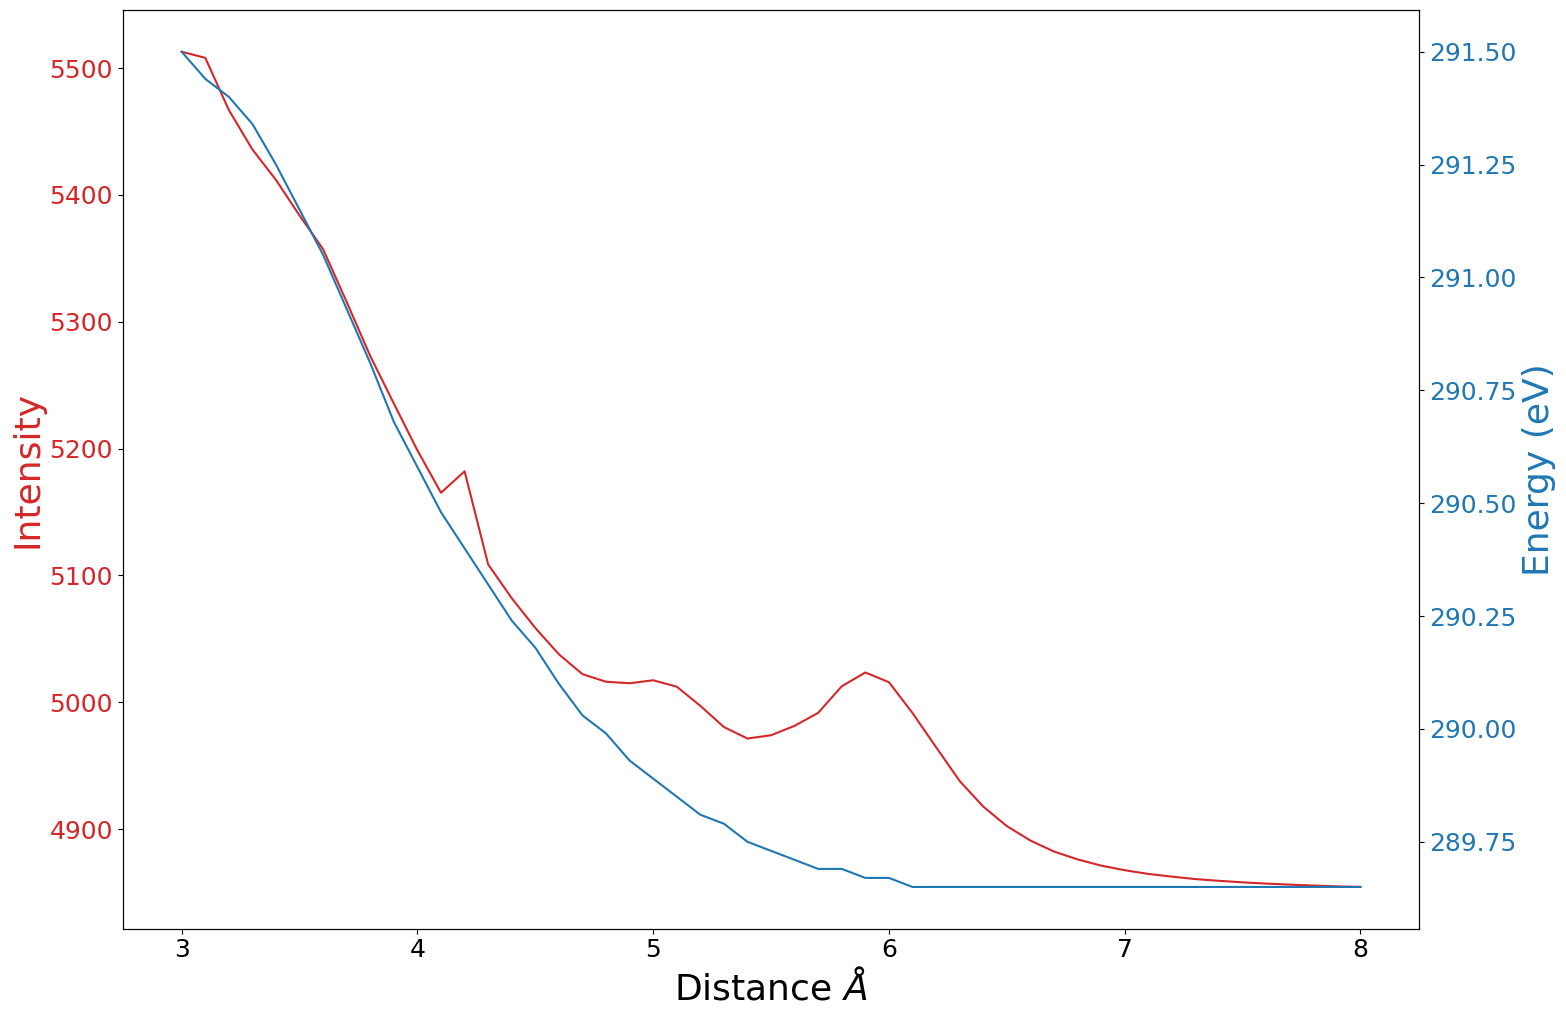

In [45]:
#x = ppr_plot3[9:40].loc[:,["Distance"]].T.values[0]
#y1 = BE_FMO_raw[9:40].loc[:,["E(ct)_Kcal/mol"]].T.values[0]
#y2 = BE_FMO_raw[9:40].loc[:,["dE(CT)/dx"]].T.values[0]

x = ppr_plot3[5:56].loc[:,["Distance"]].T.values[0]
y1 = ppr_plot3[5:56].loc[:,["Intensity"]].T.values[0]
y2 = ppr_plot3[5:56].loc[:,["Energy"]].T.values[0]

fig, ax1 = plt.subplots(figsize=(16, 10.5))

color = 'tab:red'
ax1.set_xlabel('Distance $\AA$')
ax1.set_ylabel('Intensity', color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Energy (eV)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.rc('font', size=26)
plt.savefig('Intens_Energy_range1.svg', format="svg")
plt.show()


In [46]:
from math import e, log
ln = np.log
ln(e)
newppr = ppr_plot3

def derivate(serie, colval, coldt, name):
    df1 = (serie.loc[:,colval].diff() / serie.loc[:,coldt].diff()).fillna(0)#.dropna()
    #df1.index = serie.index[0:-1]
    return pd.DataFrame({name: [i for i in df1]})

In [47]:
#newppr.insert(len(newppr.columns), 'root_ints',\
#                      (newppr["Intensity"]**.5).values)

In [48]:
#derivate(newppr[10:58],"Intensity","Distance","dI/dr")

In [49]:
#derivate(newppr,"root_ints","Distance","dI/dr")#.values
#newppr.insert(len(newppr.columns), 'dI/dr', derivate(newppr,"root_ints","Distance","dI/dr").values)

In [50]:
#dist, ppr_plot3[10:58].loc[:,["Distance"]].T.values[0]

In [51]:
from scipy.optimize import curve_fit

def invsigmoid(x, x0, l, k, b):
    return (-l / (1 + np.exp(-k*(x-x0)))) + b

def exp_trend(x, a, b, c):
    return (a * np.exp(-b*x)) + c

def exp(x, a, b):
    return a * np.exp(-b*x)

def inv_exp(x, a, b, c):
    return (-a * np.exp(b*x)) + c

dist = ppr_plot3[10:58].loc[:,["Distance"]].T.values[0]
ints = (ppr_plot3[10:58].loc[:,["Intensity"]].T.values[0])**.5
ener = ppr_plot3[10:58].loc[:,["Energy"]].T.values[0]
dist2 = []
ints2 = []
ints2.extend(ints[0:21])
ints2.extend(ints[31:])
dist2.extend(dist[0:21])
dist2.extend(dist[31:])
dist2 = np.array(dist2)
ints2 = np.array(ints2)

#x_dist_dec = dfftotal_fosce.loc[21:46,:]['Distance'].values
#y_hab_dec = dfftotal_fosce.loc[21:46,:]['inter_fosce'].values#Hab

pi = [np.median(dist),max(ints),1,min(ints)]
pe = [np.median(dist),max(ener),1,min(ener)]

popti, pcovi = curve_fit(invsigmoid,dist,ints,pi, maxfev=5000,method='dogbox')
popte, pcove = curve_fit(invsigmoid,dist,ener,pe, maxfev=5000,method='dogbox')

p1i = [47,0.73,49.5]
popti_exp_dec, pcovi_exp_dec = curve_fit(exp_trend,dist2,ints2,p1i, maxfev=10000, method='dogbox')
p1e = [22,0.75,289.6]
popte_exp_dec, pcove_exp_dec = curve_fit(exp_trend,dist,ener,p1e, maxfev=10000, method='dogbox')

/tmp/ipykernel_166173/3810082079.py:4: RuntimeWarning: overflow encountered in exp
  return (-l / (1 + np.exp(-k*(x-x0)))) + b


In [52]:
popti_exp_dec, dist, ints[-1:],popti_exp_dec[-1:]

(array([64.38856345,  0.8059594 , 69.57511329]),
 array([3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7,
        4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. ,
        6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3,
        7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.5, 9. ]),
 array([69.65434937]),
 array([69.57511329]))

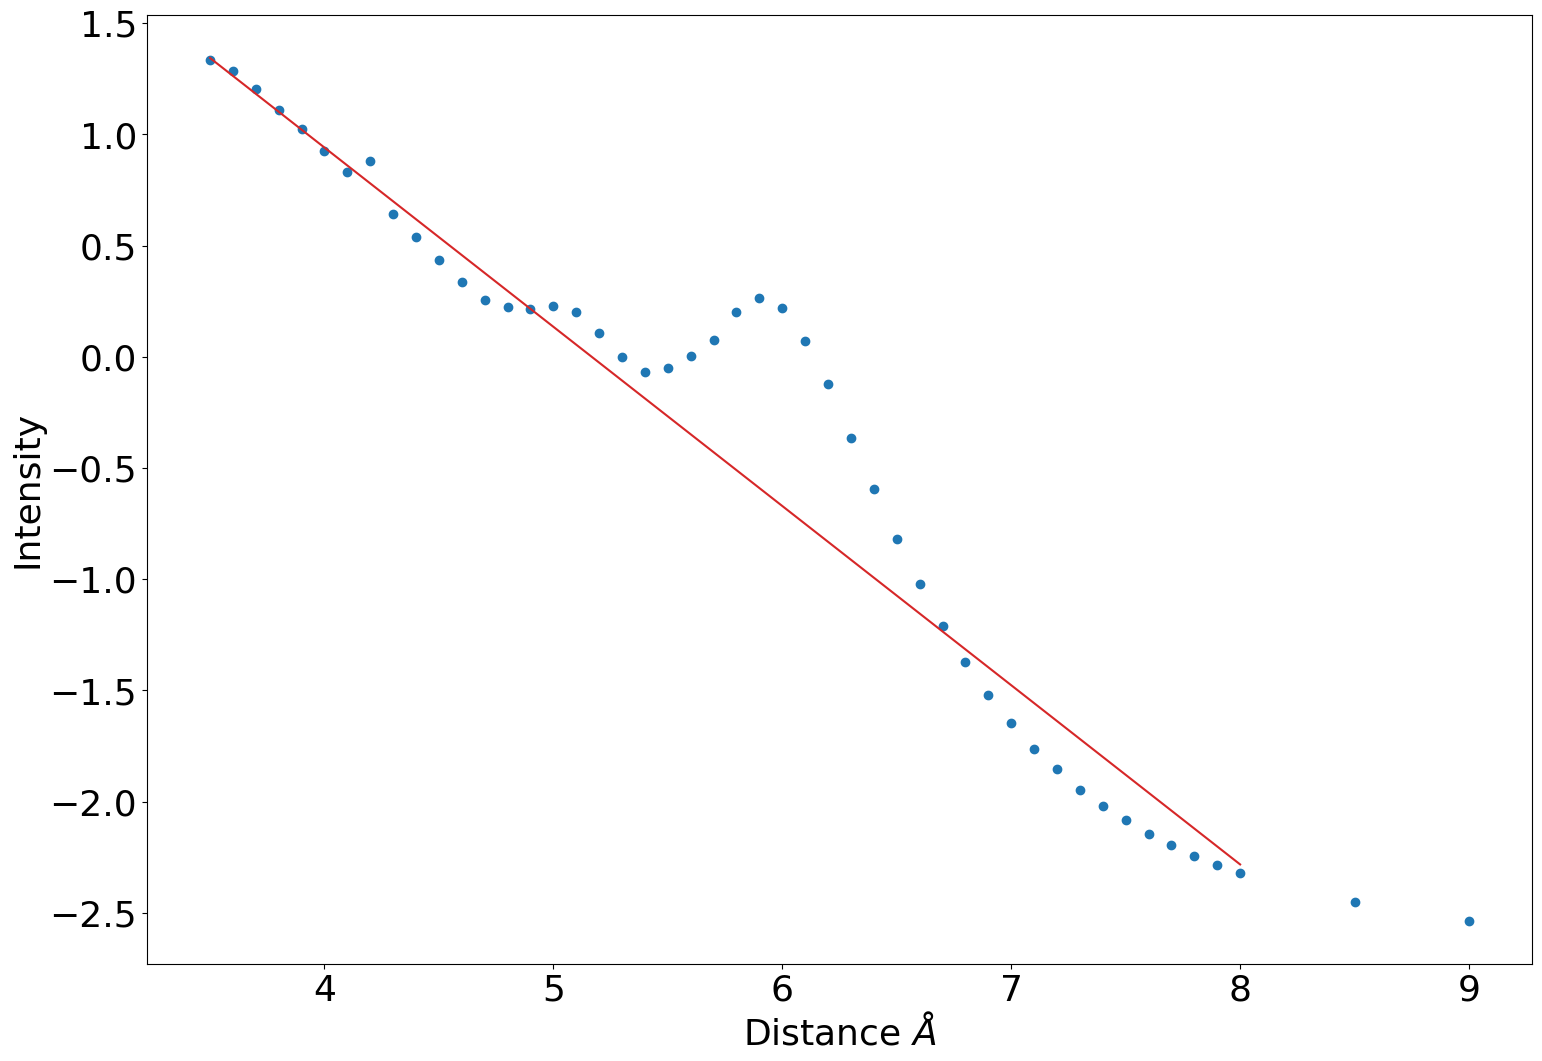

In [53]:
xi_fit = np.linspace(3.5, 8, 100)
#yi_fit = invsigmoid(xi_fit, *popti)

fig, ax1 = plt.subplots(figsize=(16, 11.2))

color = 'tab:blue'
ax1.set_xlabel('Distance $\AA$')
ax1.set_ylabel('Intensity')

ax1.plot((dist), ln(ints-popti_exp_dec[-1:]), 'o', color=color)

ax1.plot((xi_fit), ln(exp(xi_fit, *popti_exp_dec[0:2])), color='tab:red')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.rc('font', size=26)
#plt.savefig('Hab_sigmoidal.svg', format="svg")
plt.show()

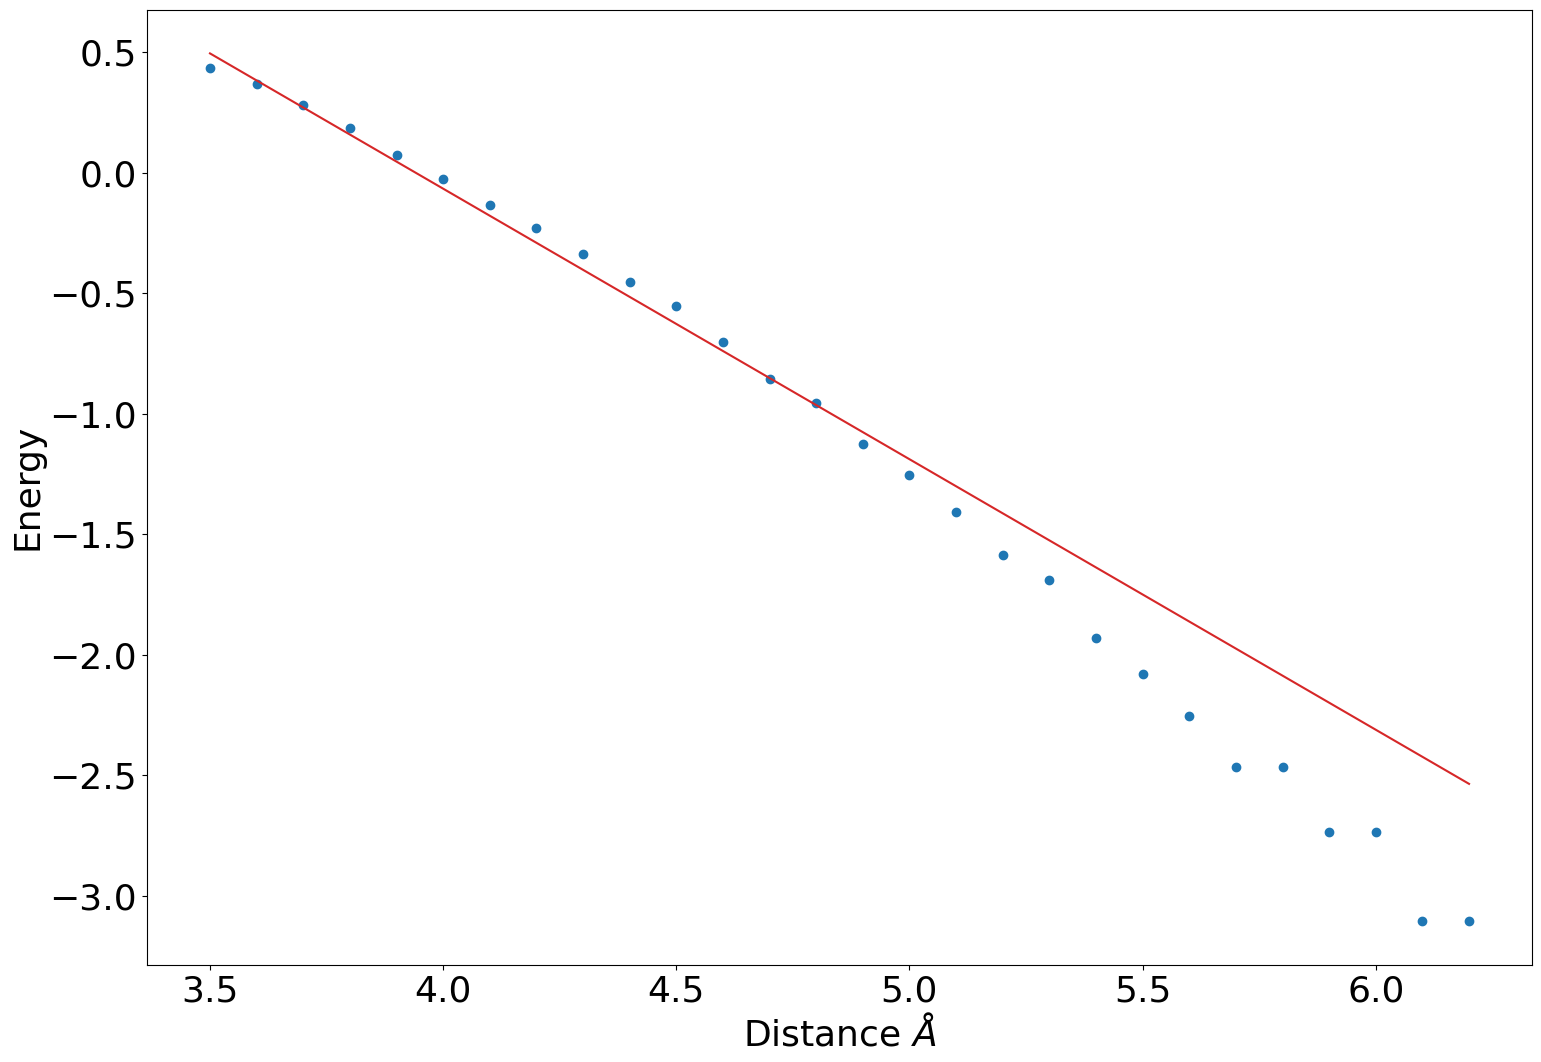

In [54]:
xe_fit = np.linspace(3.5, 6.2, 100)

fig, ax1 = plt.subplots(figsize=(16, 11.2))

color = 'tab:blue'
ax1.set_xlabel('Distance $\AA$')
ax1.set_ylabel('Energy')

ax1.plot((dist[:-20]), ln(ener[:-20]-popte_exp_dec[-1:]), 'o', color=color)

ax1.plot((xe_fit), ln(exp(xe_fit, *popte_exp_dec[0:2])), color='tab:red')

#ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.rc('font', size=26)
#plt.savefig('Hab_sigmoidal.svg', format="svg")
plt.show()

In [55]:
popte_exp_dec, 

(array([ 83.46440953,   1.12271119, 289.60525896]),)

In [56]:
popti_exp_dec

array([64.38856345,  0.8059594 , 69.57511329])

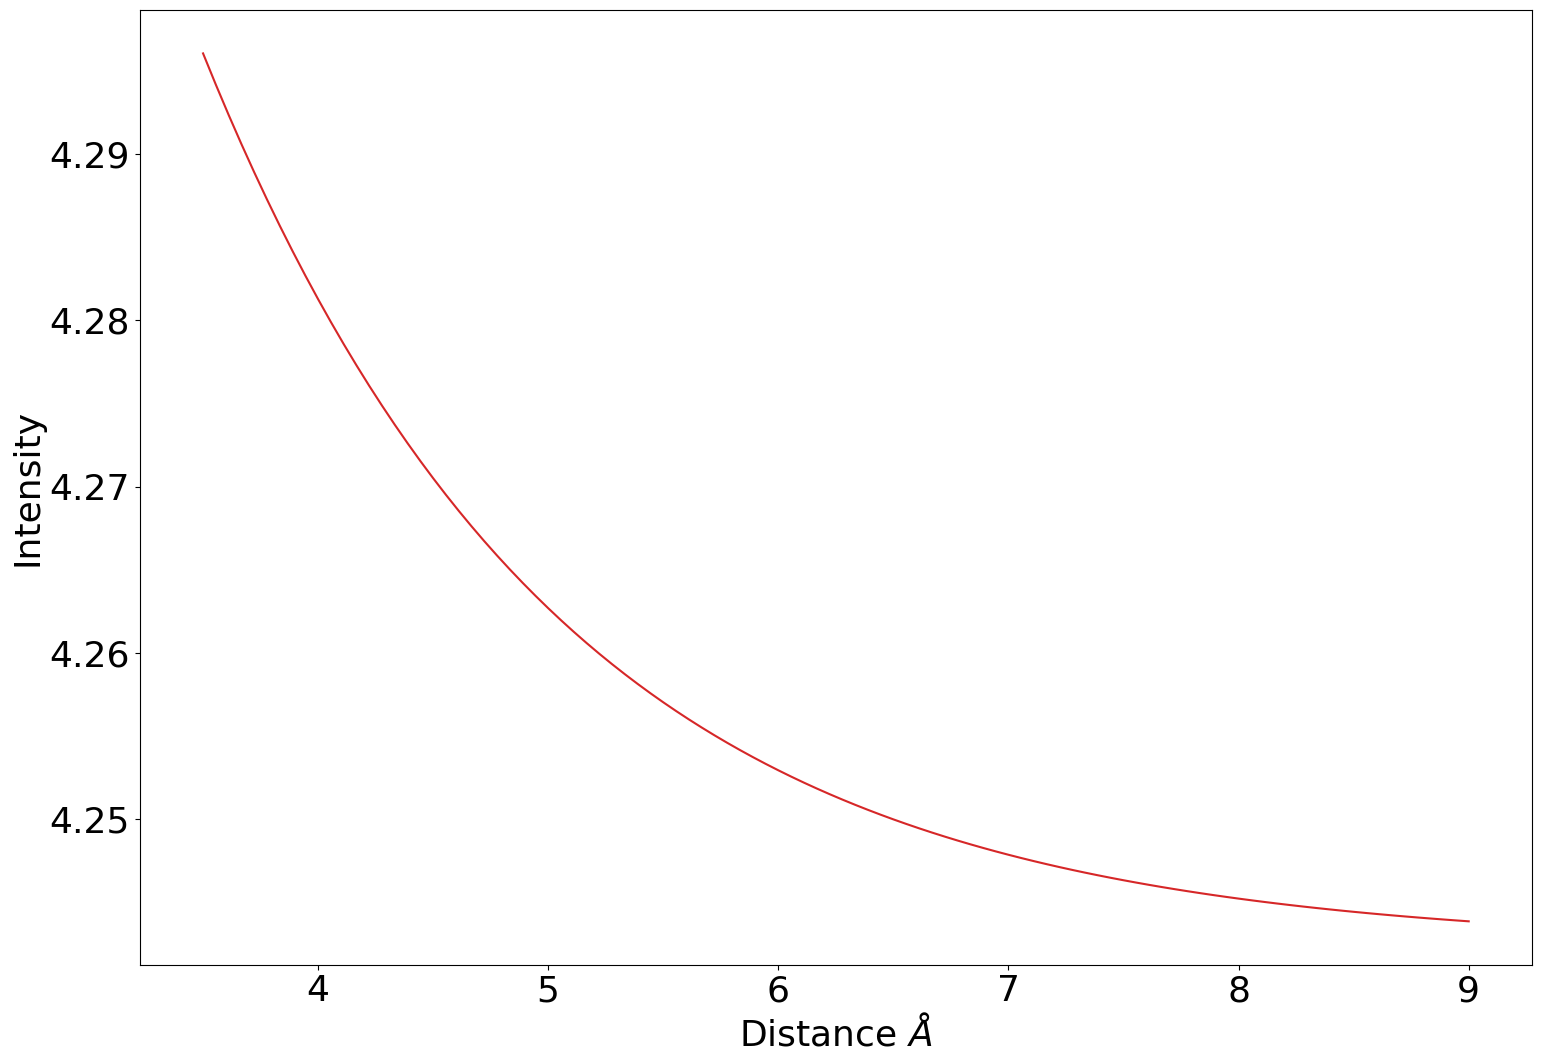

In [57]:
xe_fit = np.linspace(3.5, 9.0, 100)
ye_fit = invsigmoid(xe_fit, *popte)

fig, ax1 = plt.subplots(figsize=(16, 11.2))

color = 'tab:blue'
ax1.set_xlabel('Distance $\AA$')
ax1.set_ylabel('Intensity')
#ax1.plot(dist[5:], ener[5:], 'o', color=color)
#ax1.plot(dist[5:], ln(ener[5:]), 'o', color='tab:red')
#ax1.plot(xe_fit, ye_fit, color=color)
#popte_exp_dec = [22,0.75,289.6]
ax1.plot(xe_fit, ln(exp_trend(xi_fit, *popti_exp_dec)), color='tab:red')
#ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.rc('font', size=26)
#plt.savefig('Hab_sigmoidal.svg', format="svg")
plt.show()

In [58]:
popti_exp_dec

array([64.38856345,  0.8059594 , 69.57511329])

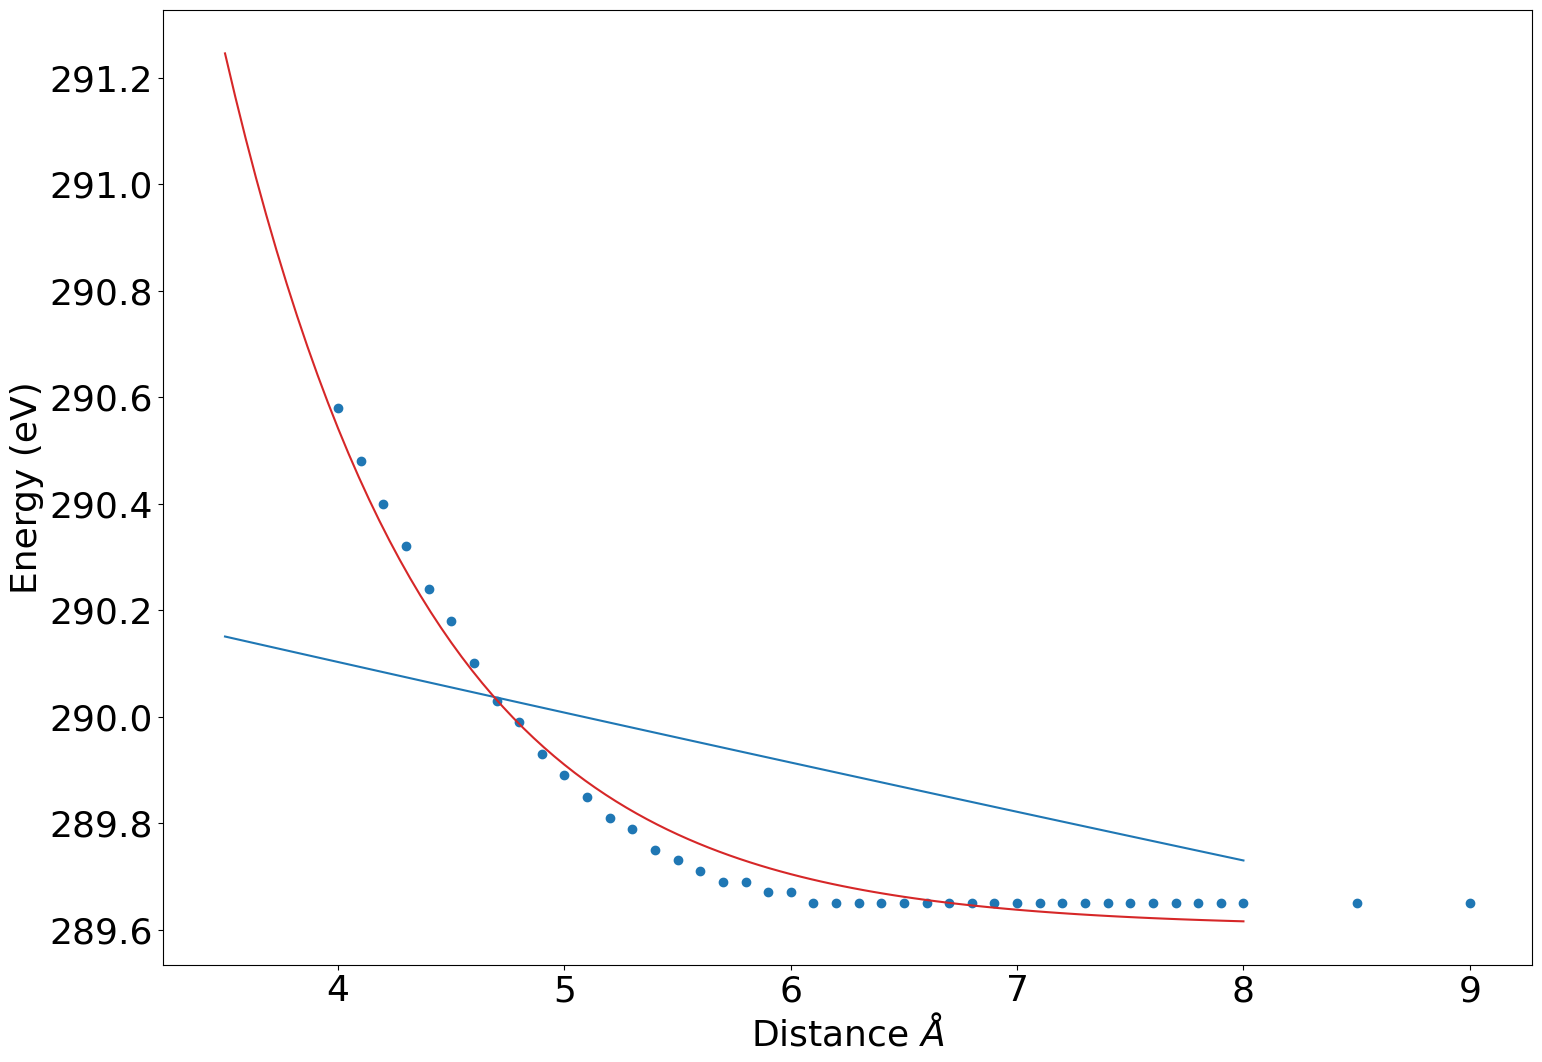

In [59]:
xe_fit = np.linspace(3.5, 8.0, 100)
ye_fit = invsigmoid(xe_fit, *popte)

fig, ax1 = plt.subplots(figsize=(16, 11.2))

color = 'tab:blue'
ax1.set_xlabel('Distance $\AA$')
ax1.set_ylabel('Energy (eV)')
ax1.plot(dist[5:], ener[5:], 'o', color=color)
ax1.plot(xe_fit, ye_fit, color=color)
#popte_exp_dec = [22,0.75,289.6]
ax1.plot(xe_fit, exp_trend(xe_fit, *popte_exp_dec), color='tab:red')
#ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.rc('font', size=26)
#plt.savefig('Hab_sigmoidal.svg', format="svg")
plt.show()

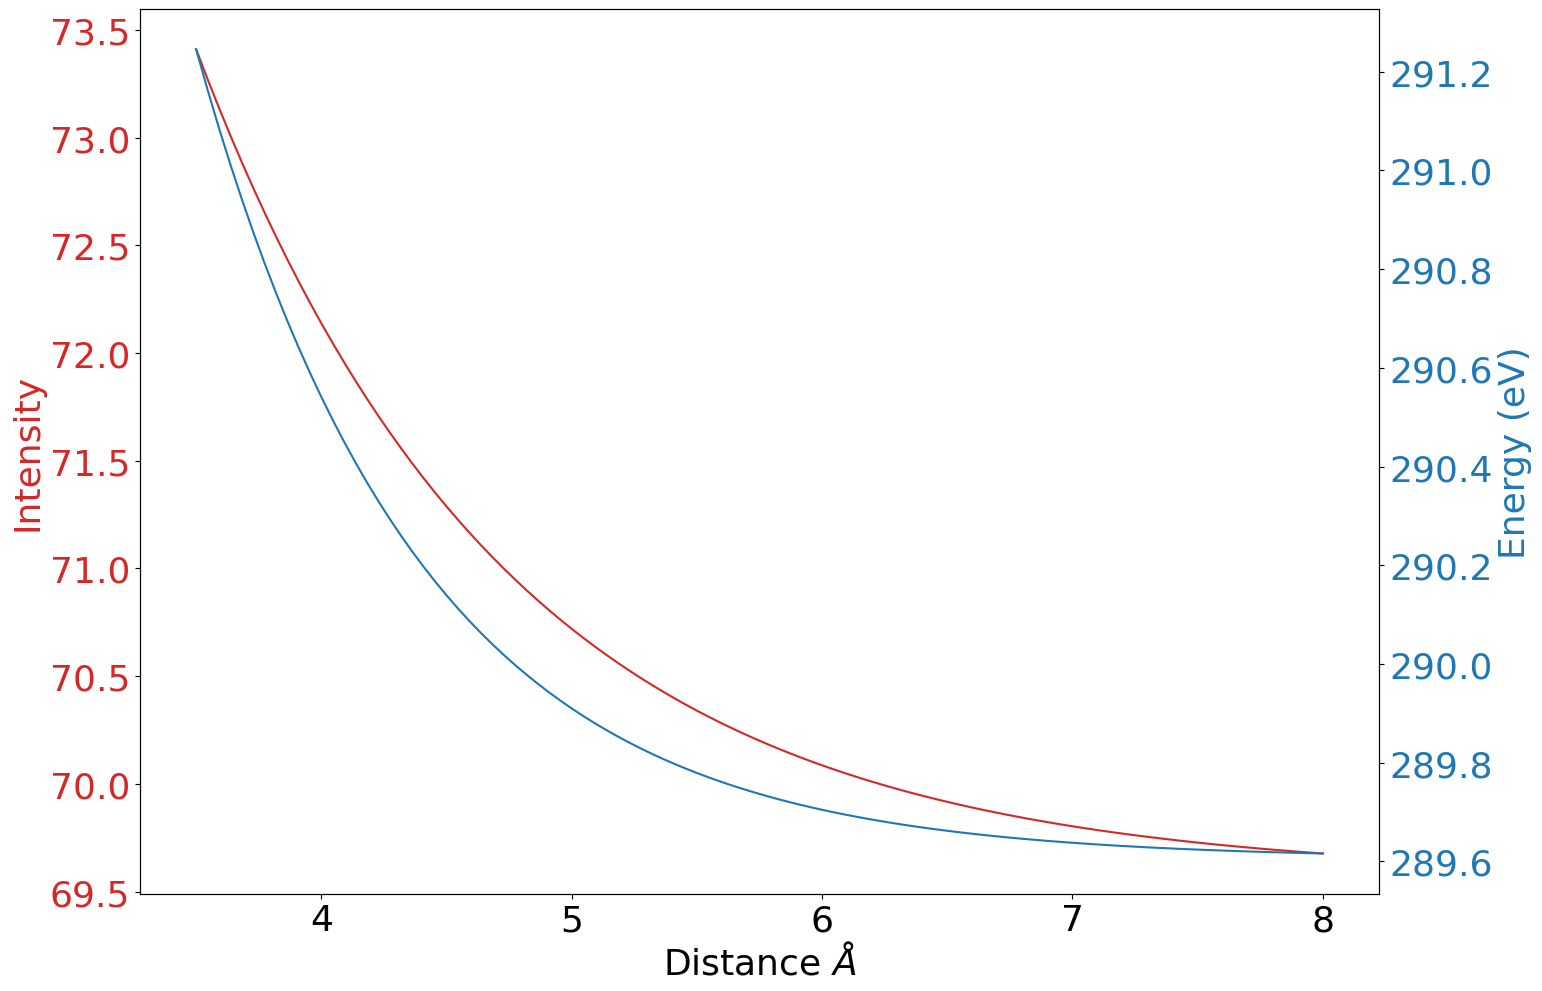

In [60]:
x_fit = np.linspace(3.5, 8.0, 100)
y1_fit = exp_trend(xi_fit, *popti_exp_dec)
y2_fit = exp_trend(xe_fit, *popte_exp_dec)

fig, ax1 = plt.subplots(figsize=(16, 10.5))

color = 'tab:red'
ax1.set_xlabel('Distance $\AA$')
ax1.set_ylabel('Intensity', color=color)
ax1.plot(x_fit, y1_fit, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Energy (eV)', color=color)  # we already handled the x-label with ax1
ax2.plot(x_fit, y2_fit, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.rc('font', size=26)
#plt.savefig('Intens_Energy_range1.svg', format="svg")
plt.show()

In [61]:
def linear_trend(x, a, b):
    return (a * x) + b

In [62]:
x_linear_hab = np.linspace(3.5, 7.1, 100)

p3 = [1,0]

In [63]:
x_fit = np.linspace(3.5, 8.0, 100)
y1_fit = exp_trend(xi_fit, *popti_exp_dec)
y2_fit = exp_trend(xe_fit, *popte_exp_dec)

popt_linear_i, pcov_linear_i = curve_fit(linear_trend,x_linear_hab, ln(y1_fit),p3,method='dogbox')
popt_linear_e, pcov_linear_e = curve_fit(linear_trend,x_linear_hab, ln(y2_fit),p3,method='dogbox')

In [64]:
popt_linear_i, popt_linear_e

(array([-0.01223012,  4.32194589]), array([-1.15596277e-03,  5.67577534e+00]))

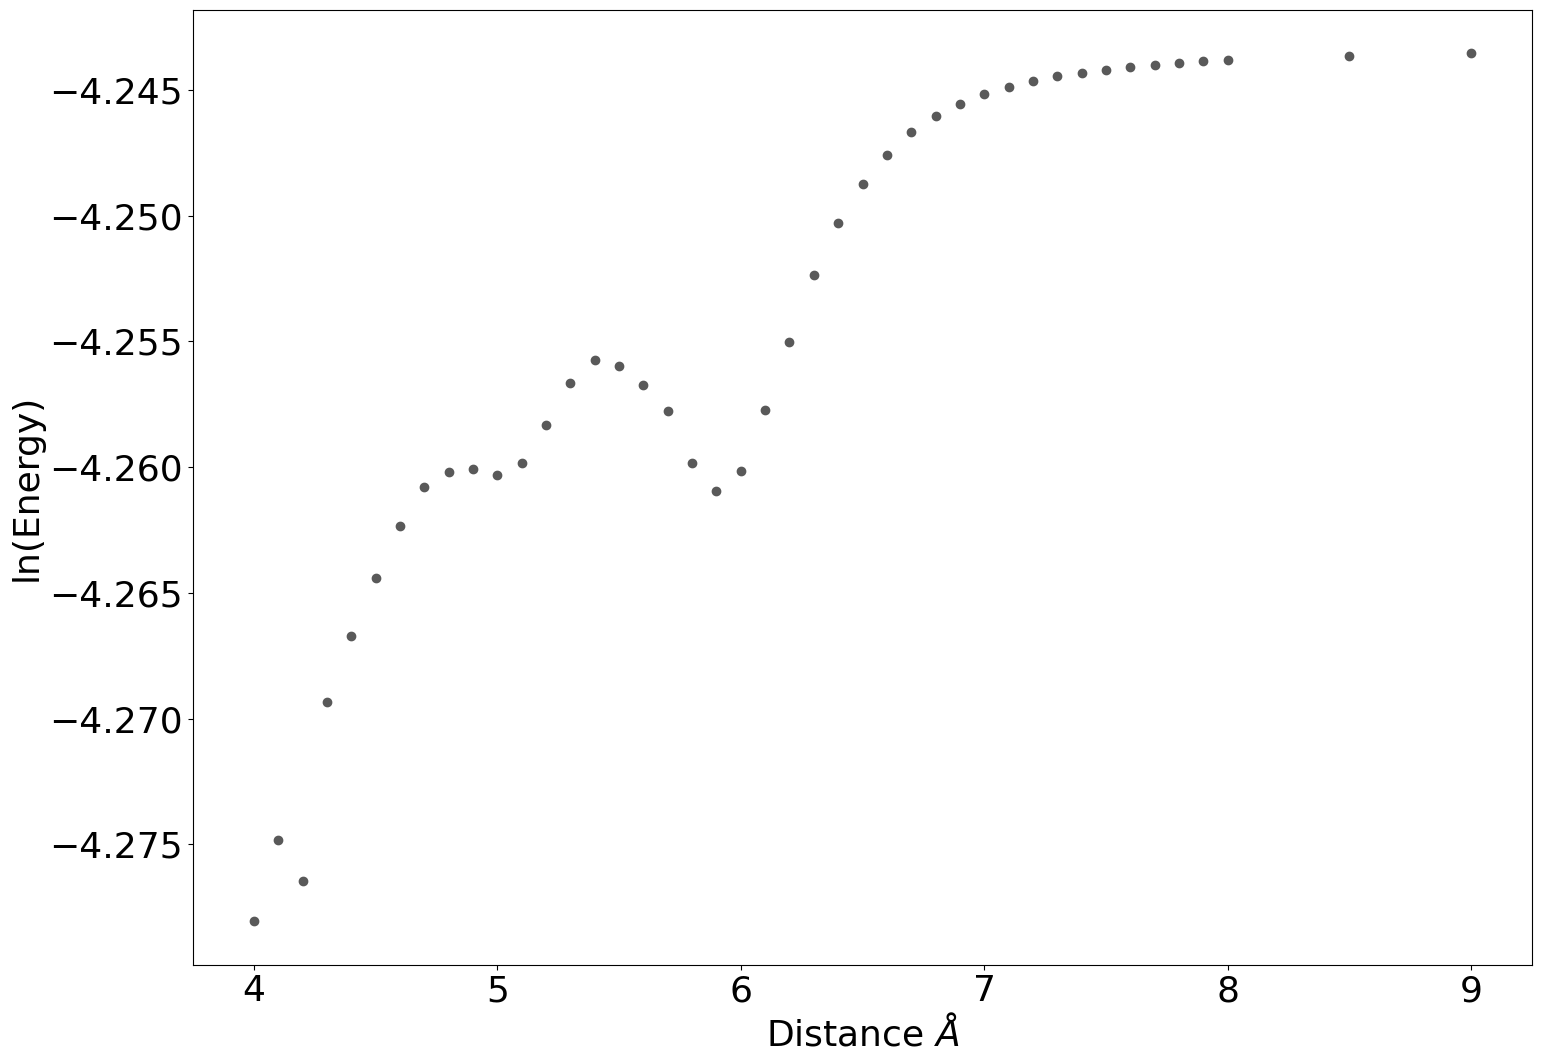

In [65]:
x_linear = np.linspace(3.5, 8.0, 100)

fig, ax1 = plt.subplots(figsize=(16, 11.2))

color = 'tab:blue'
ax1.set_xlabel('Distance $\AA$')
#ax1.set_ylabel('ln(Intensity)')
ax1.set_ylabel('ln(Energy)')

#ax1.plot(x_linear, linear_trend(x_linear,*popt_linear_i), label='fit_intensity', color='tab:purple')
ax1.plot(dist[5:], ln(1/ints[5:]), 'o', label='fit_Hab1', color='0.35')
#ax1.plot(x_linear, linear_trend(x_linear,*popt_linear_e), label='fit_energy', color='tab:cyan')
#ax1.plot(dist[5:], ln(ener[5:]), 'o', label='fit_Hab1', color='0.35')

#ax1.plot(x_plt, y_plt, 'o', color=color)
#ax1.plot(x_fit, y_fit, color=color)
#ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.rc('font', size=26)
#plt.savefig('beta_decay.svg', format="svg")
plt.show()

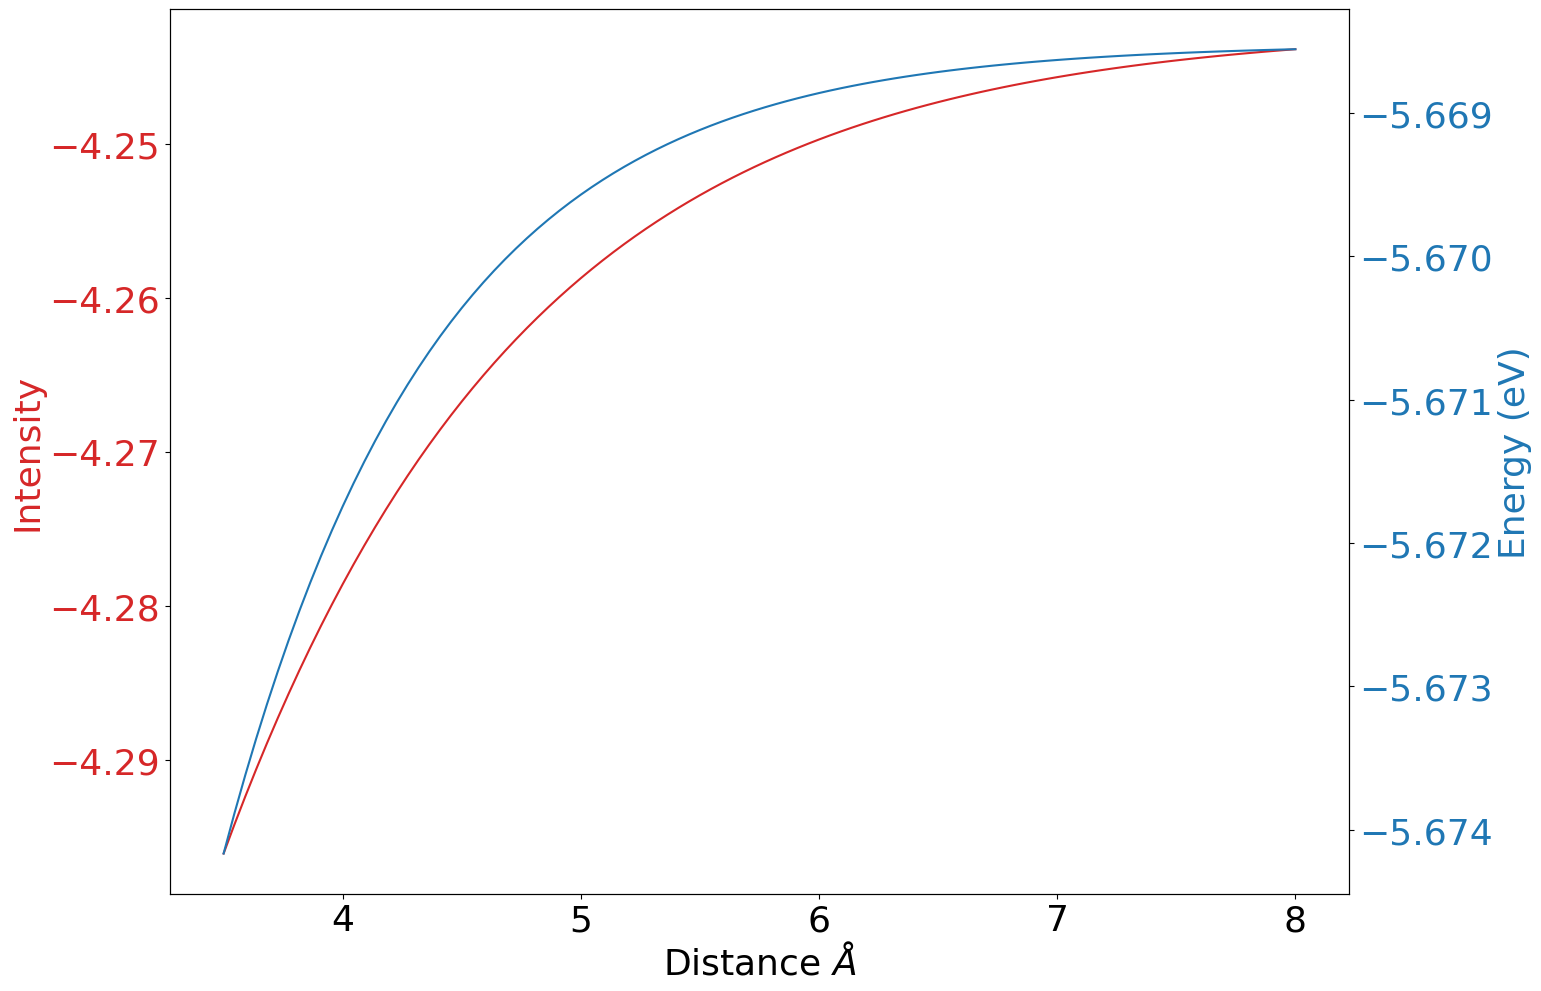

In [66]:
x_fit = np.linspace(3.5, 8.0, 100)
y1_fit = exp_trend(xi_fit, *popti_exp_dec)
y2_fit = exp_trend(xe_fit, *popte_exp_dec)

fig, ax1 = plt.subplots(figsize=(16, 10.5))

color = 'tab:red'
ax1.set_xlabel('Distance $\AA$')
ax1.set_ylabel('Intensity', color=color)
ax1.plot(x_fit, ln(1/y1_fit), color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Energy (eV)', color=color)  # we already handled the x-label with ax1
ax2.plot(x_fit, ln(1/y2_fit), color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.rc('font', size=26)
#plt.savefig('Intens_Energy_range1.svg', format="svg")
plt.show()

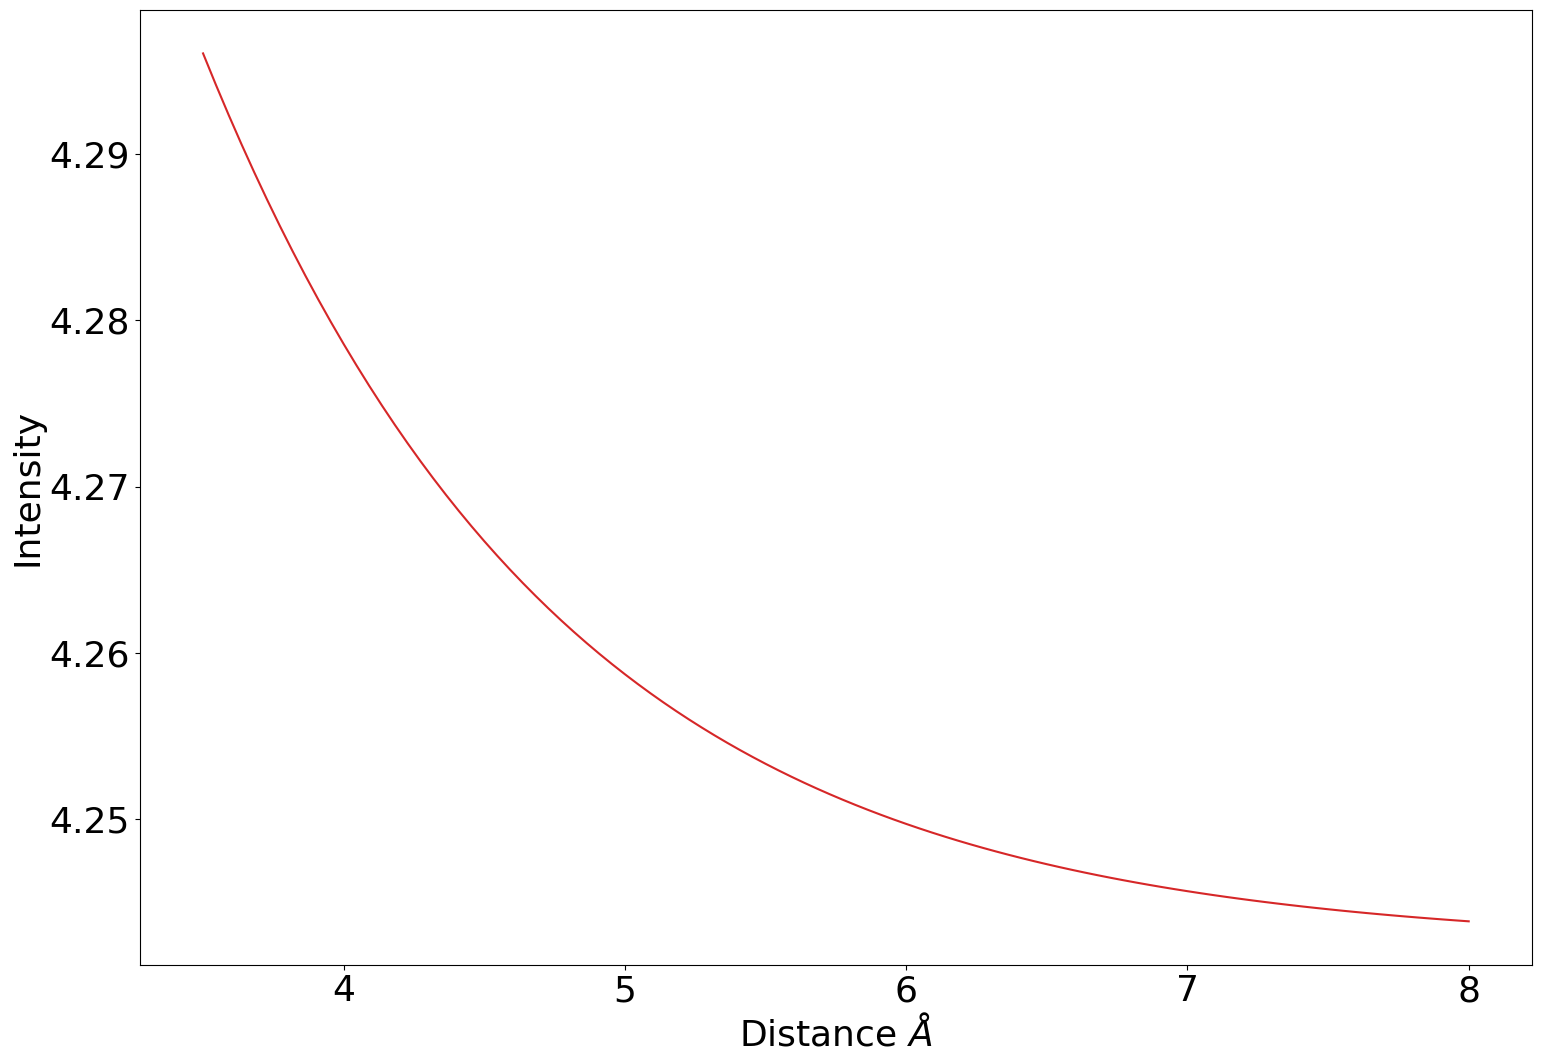

In [67]:
xe_fit = np.linspace(3.5, 8.0, 100)
ye_fit = invsigmoid(xe_fit, *popte)

fig, ax1 = plt.subplots(figsize=(16, 11.2))

color = 'tab:blue'
ax1.set_xlabel('Distance $\AA$')
ax1.set_ylabel('Intensity')
#ax1.plot(dist[5:], ener[5:], 'o', color=color)
#ax1.plot(dist[5:], ln(ener[5:]), 'o', color='tab:red')
#ax1.plot(xe_fit, ye_fit, color=color)
#popte_exp_dec = [22,0.75,289.6]
ax1.plot(xe_fit, ln(exp_trend(xi_fit, *popti_exp_dec)), color='tab:red')
#ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.rc('font', size=26)
#plt.savefig('Hab_sigmoidal.svg', format="svg")
plt.show()

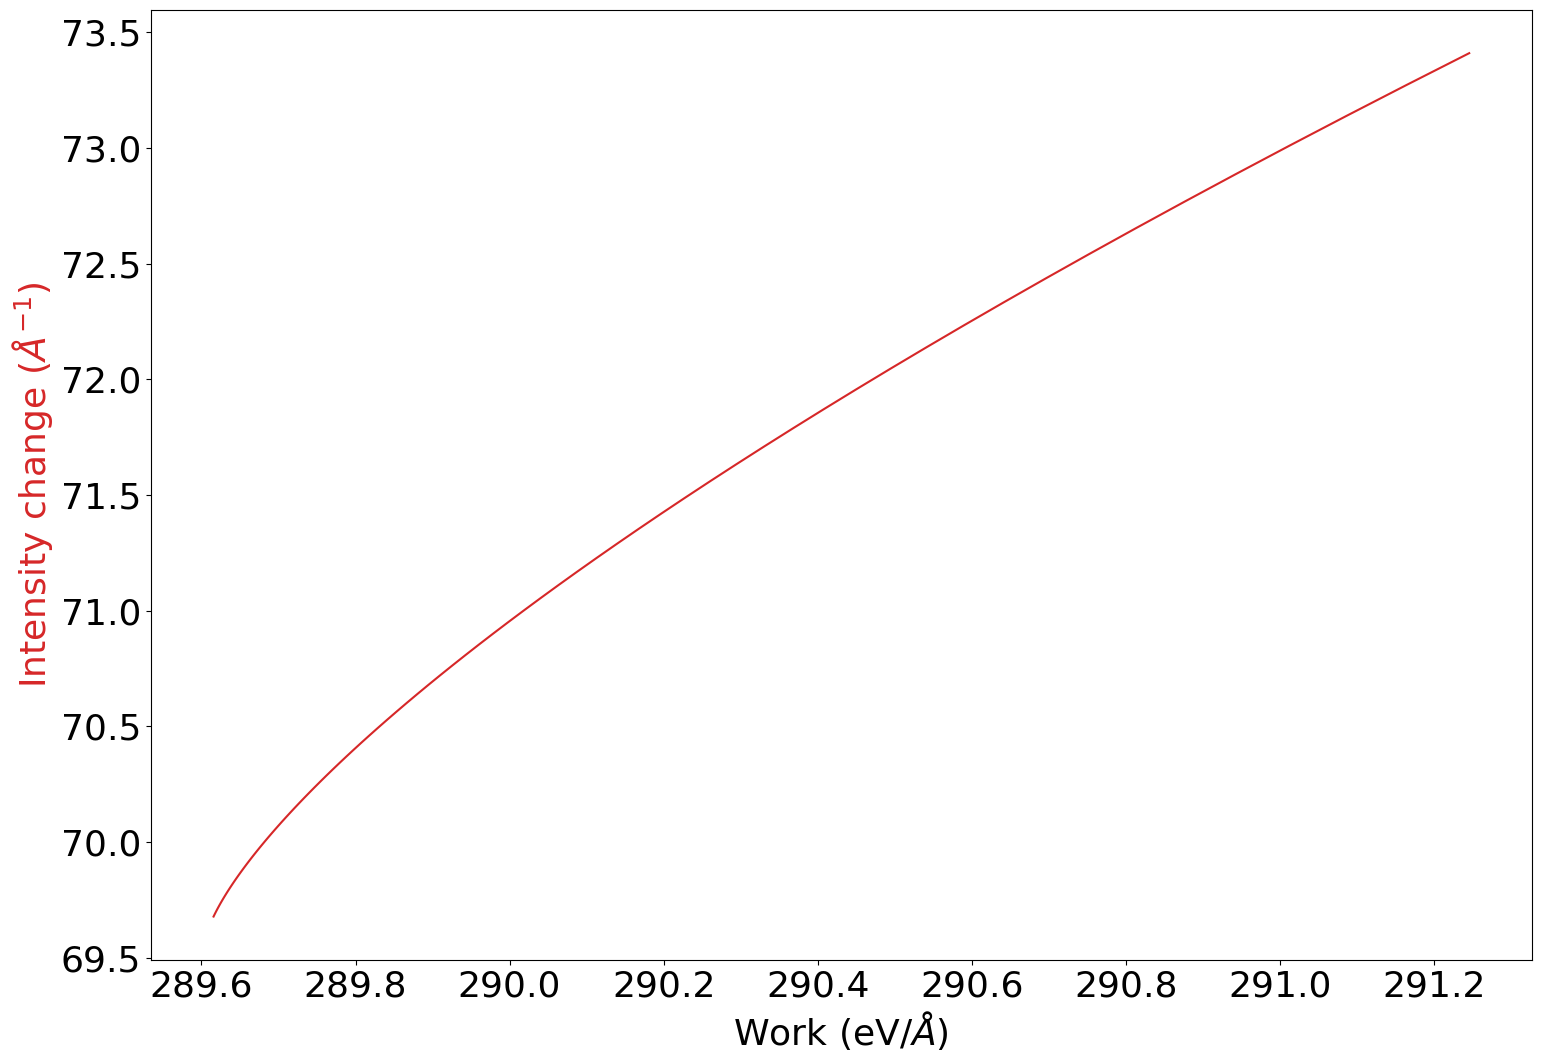

In [68]:
xie_fit = np.linspace(3.5, 8.0, 100)
y_fiti = exp_trend(xie_fit, *popti_exp_dec)
y_fite = exp_trend(xie_fit, *popte_exp_dec)

fig, ax1 = plt.subplots(figsize=(16, 11.2))

color = 'tab:red'
ax1.set_xlabel('Work (eV/$\AA$)')
ax1.set_ylabel('Intensity change ($\AA^{-1}$)', color=color)
ax1.plot(y_fite, y_fiti, color=color)

#ax1.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.rc('font', size=26)
#plt.savefig('Hab_sigmoidal.svg', format="svg")
plt.show()

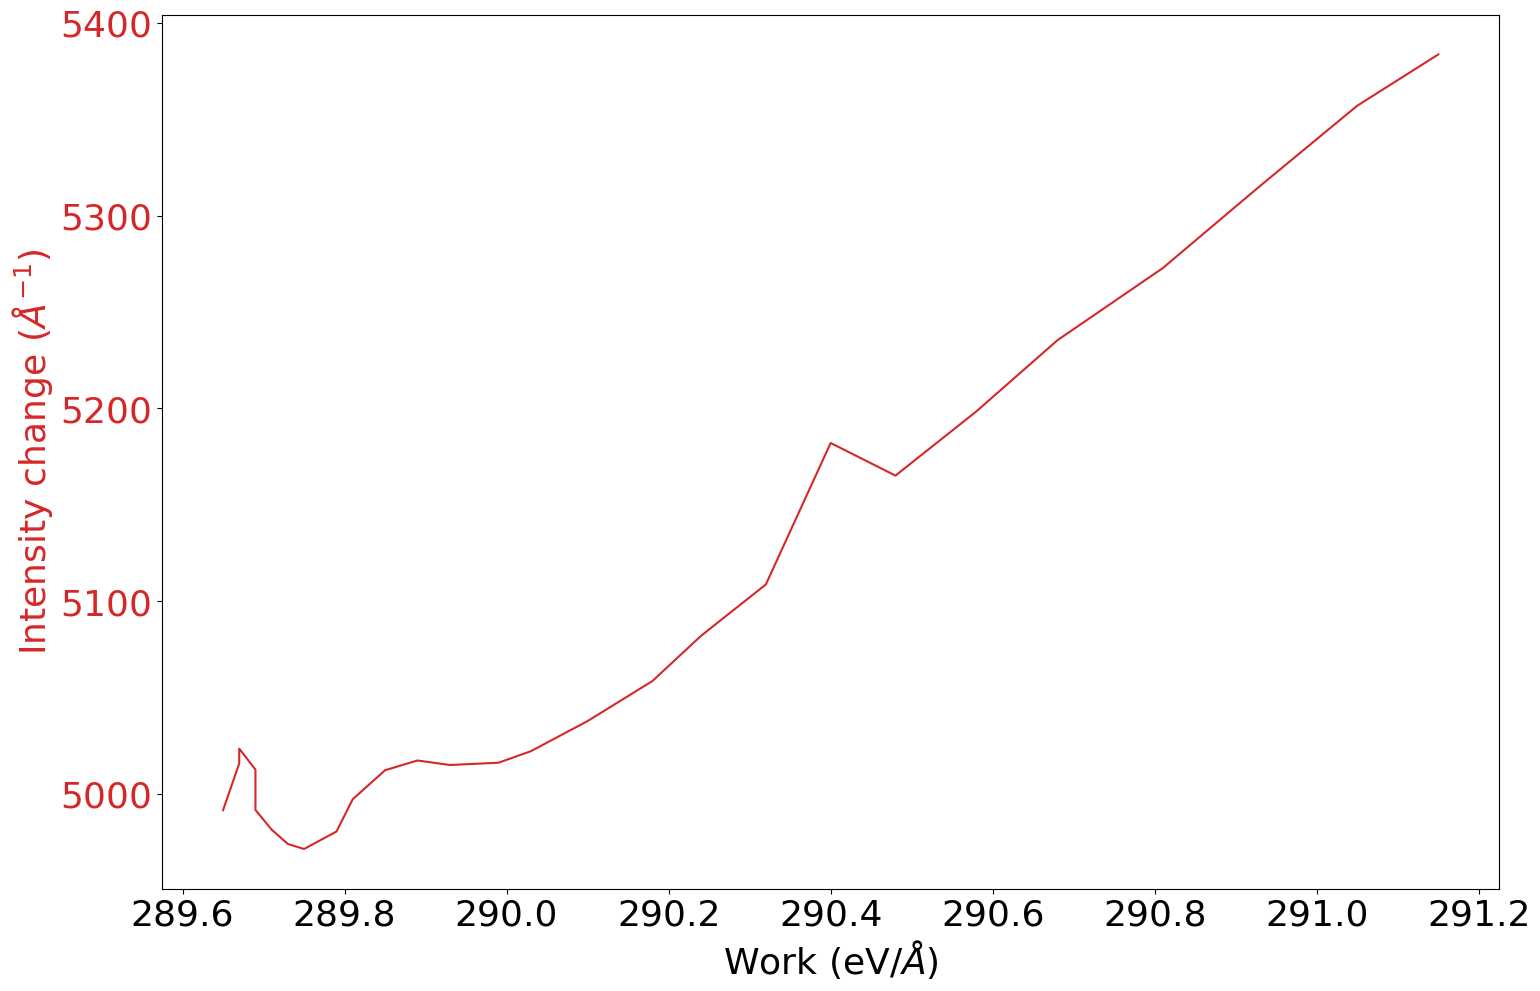

In [69]:
#x = ppr_plot3[9:40].loc[:,["Distance"]].T.values[0]
#y1 = BE_FMO_raw[9:40].loc[:,["E(ct)_Kcal/mol"]].T.values[0]
#y2 = BE_FMO_raw[9:40].loc[:,["dE(CT)/dx"]].T.values[0]

x = ppr_plot3[10:37].loc[:,["Distance"]].T.values[0]
y1 = ppr_plot3[10:37].loc[:,["Intensity"]].T.values[0]
y2 = ppr_plot3[10:37].loc[:,["Energy"]].T.values[0]

fig, ax1 = plt.subplots(figsize=(16, 10.5))

color = 'tab:red'
ax1.set_xlabel('Work (eV/$\AA$)')
ax1.set_ylabel('Intensity change ($\AA^{-1}$)', color=color)
ax1.plot(y2, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

#ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
#ax2.set_ylabel('Energy (eV)', color=color)  # we already handled the x-label with ax1
#ax2.plot(x, y2, color=color)
#ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.rc('font', size=26)
#plt.savefig('Intens_Energy_range1.svg', format="svg")
plt.show()


In [70]:
x

array([3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7,
       4.8, 4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. ,
       6.1])

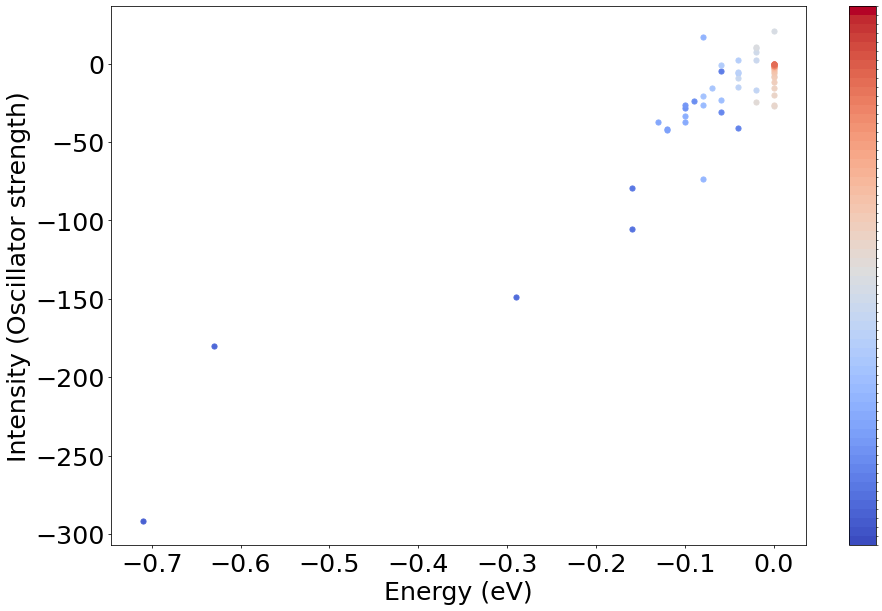

In [71]:
new_evsi = pd.DataFrame({'Energy': [global_name_cut_1[cc+1]['Energy'] - global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf)-1)], \
 'Intensity': [global_name_cut_1[cc+1]['Intensity'] - global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf)-1)]})
neww_evsi = [new_evsi.iloc[ii] for ii in range(len(list_suf)-1)]
plot_alot_xray(neww_evsi, list_suf[:-1], 'Energy', 'Intensity', dpi=70, markersize=5.3)

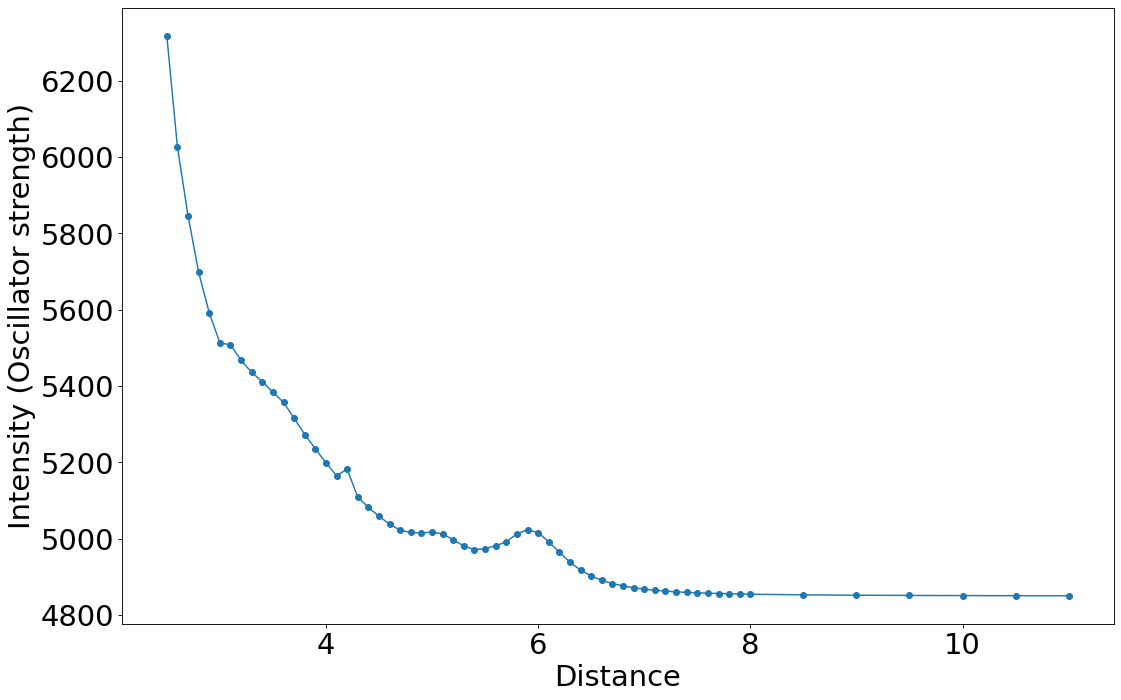

In [72]:
new_df = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})
new_df_3 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [1/global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})

label_name = [str(ii/10)+'A' for ii in list_suf]
x_arg='Distance'
y_arg='Intensity'
figsize=(16, 10)
dpi=80
linestyle='-'
marker='o'
linewidth=1.3
markersize=5.3
colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(new_df)))
#    else:
#        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)
#n1.plot(x_arg, y_arg, data=new_df_3, linestyle=linestyle, marker=marker, linewidth=linewidth, \
#                markersize=markersize, label=label_name)
n1.plot(x_arg, y_arg, data=new_df, linestyle=linestyle, marker=marker, linewidth=linewidth, \
                markersize=markersize, label=label_name)
plt.xlabel('Distance')
plt.ylabel('Intensity (Oscillator strength)')
#plt.legend(loc='upper left');
plt.show()

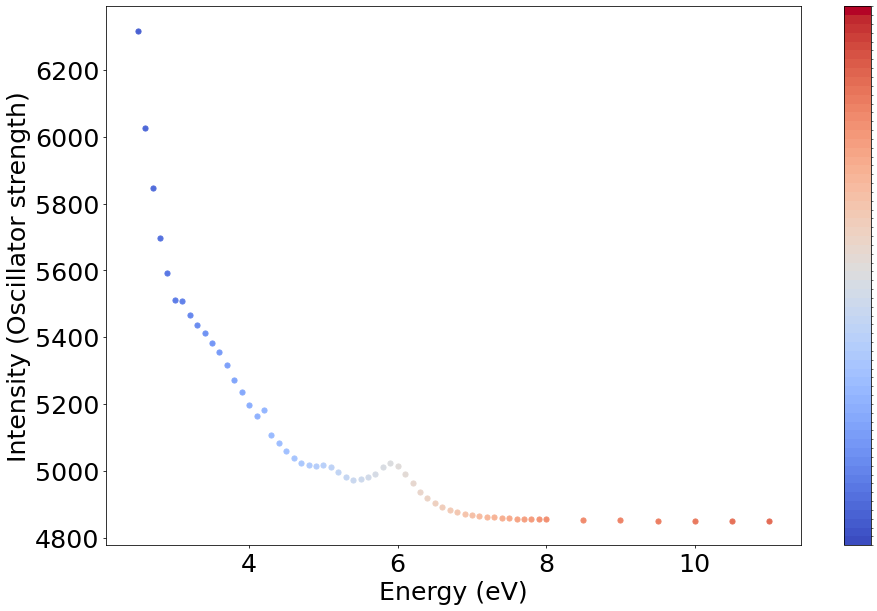

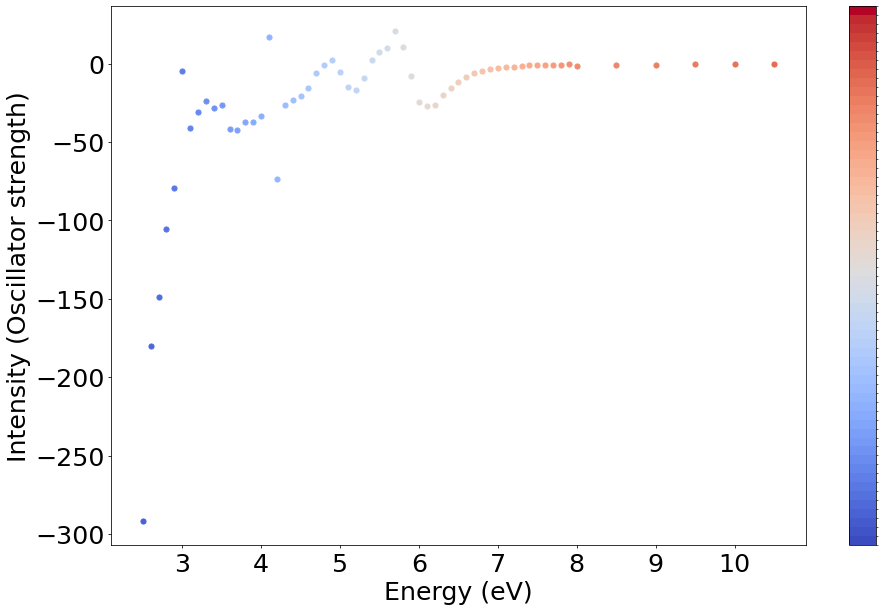

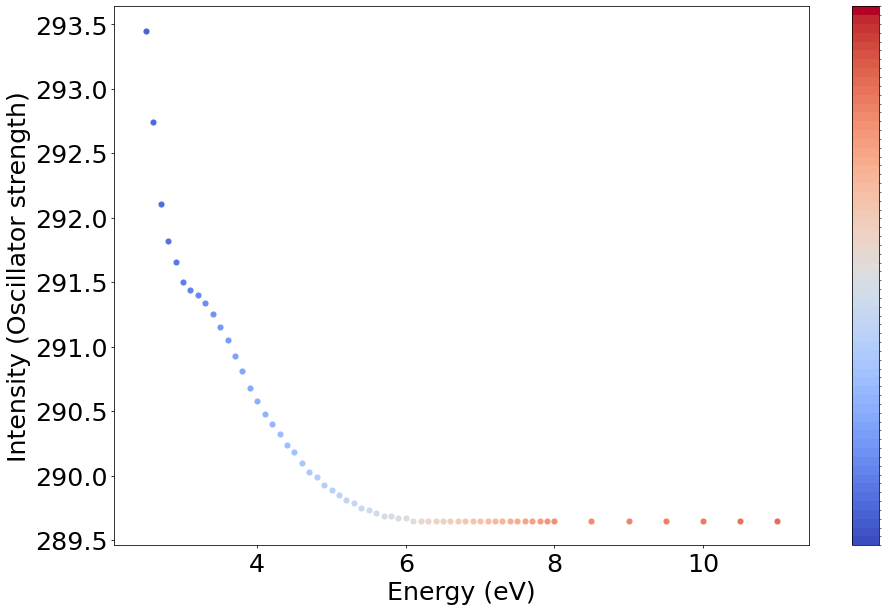

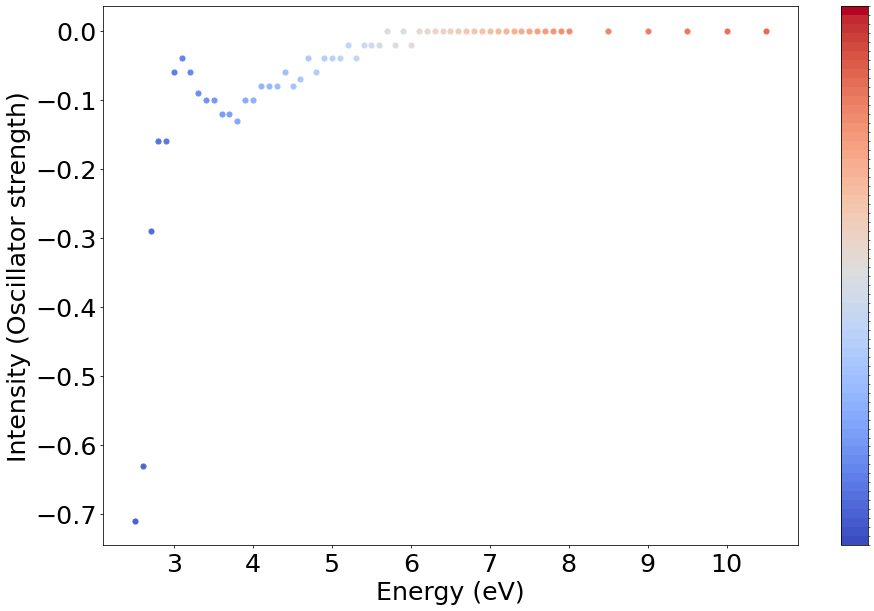

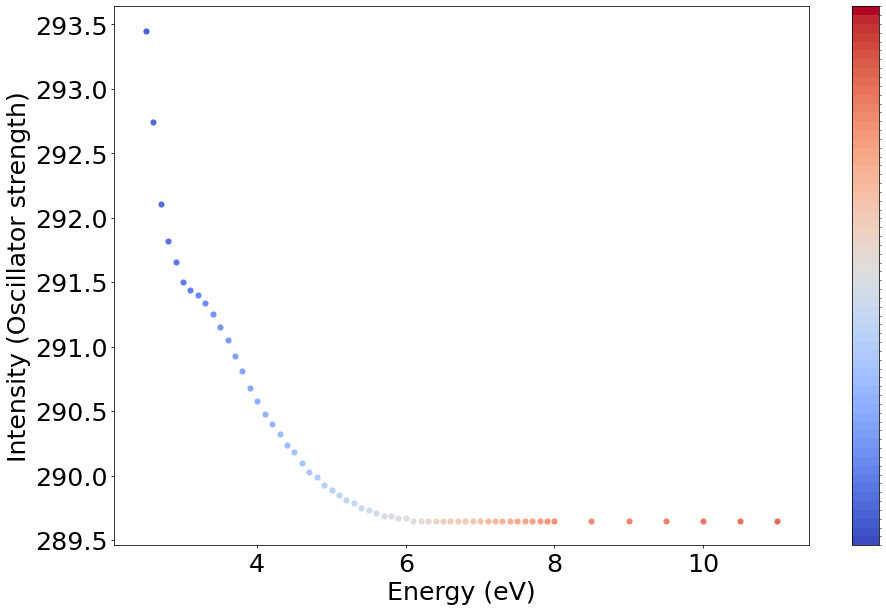

In [73]:
new_df = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})
#new_df_3 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
# 'Intensity': [1/math.log(global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})

new_df_3 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf)-1)], \
 'Intensity': [(global_name_cut_1[cc+1]['Intensity']-global_name_cut_1[cc]['Intensity']) \
               for cc in range(len(list_suf)-1)]})




new_df_4 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
#new_df_5 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
# 'Energy': [1/math.log(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})#favourite one

new_df_5 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf)-1)], \
 'Energy': [(global_name_cut_1[cc+1]['Energy']-global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf)-1)]})#favourite one

new_df_6 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy']+(1/global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})

neww_df = [new_df.iloc[ii] for ii in range(len(list_suf))]
neww_df_2 = [new_df_3.iloc[ii] for ii in range(len(list_suf)-1)]
neww_df_3 = [new_df_4.iloc[ii] for ii in range(len(list_suf))]
neww_df_4 = [new_df_5.iloc[ii] for ii in range(len(list_suf)-1)]
neww_df_5 = [new_df_6.iloc[ii] for ii in range(len(list_suf))]
label_name = [str(ii/10)+'A' for ii in list_suf]
plot_alot_xray(neww_df, list_suf, 'Distance', 'Intensity', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_2, list_suf[:-1], 'Distance', 'Intensity', dpi=70, markersize=5.3,
              plotsvg=True, nameplt='deltaI_zone1.svg')
plot_alot_xray(neww_df_3, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_4, list_suf[:-1], 'Distance', 'Energy', dpi=70, markersize=5.3,
              plotsvg=True, nameplt='deltaE_zone1.svg')
plot_alot_xray(neww_df_5, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3)
#, plotsvg=True, nameplt='total_predge_region1.svg')

### new range for draft

In [74]:
list_suf_cut = list_suf[5:42]

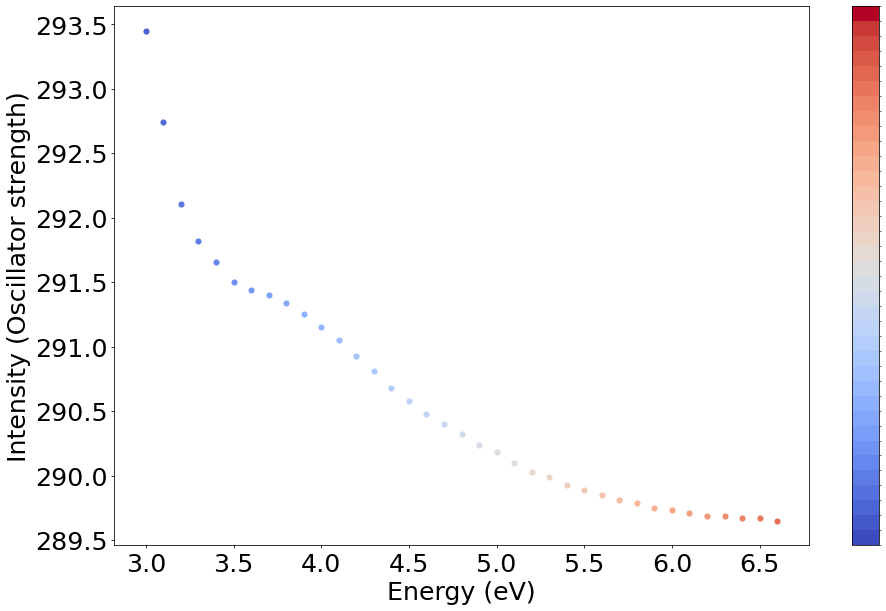

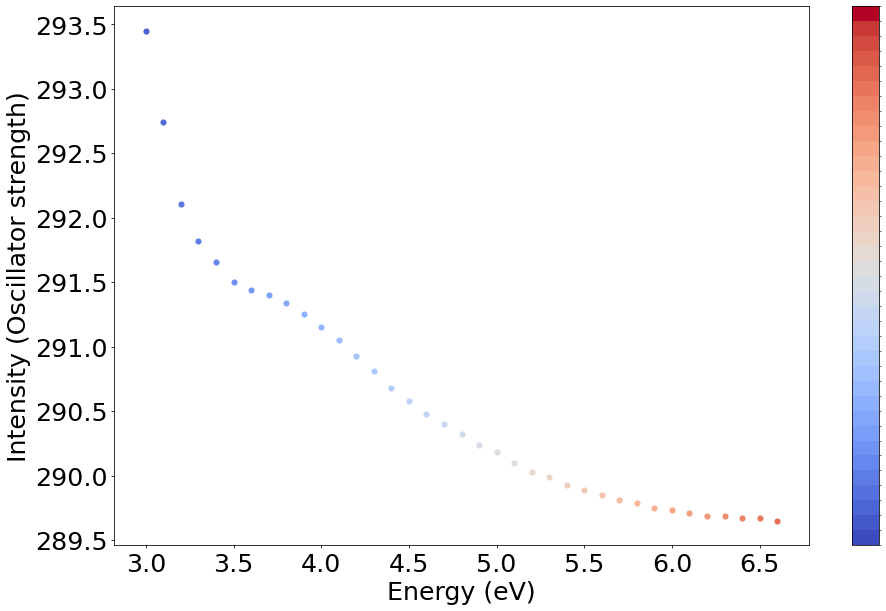

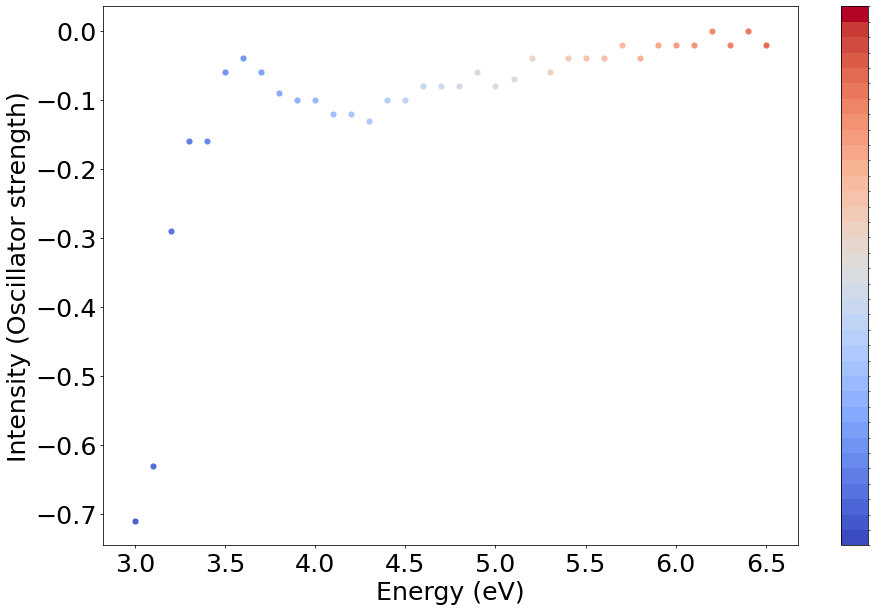

In [75]:
new_df_cutedr = pd.DataFrame({'Distance': [list_suf_cut[cc]/10 for cc in range(len(list_suf_cut))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf_cut))]})
new_df_cutemod = pd.DataFrame({'Distance': [list_suf_cut[cc]/10 for cc in range(len(list_suf_cut))], \
 #'Energy': [math.exp(-1/(new_df_cutedr.iloc[cc]['Energy'])) \
 'Energy': [(new_df_cutedr.iloc[cc]['Energy']) \
            for cc in range(len(list_suf_cut))]})
new_df_cutedelta = pd.DataFrame({'Distance': [list_suf_cut[cc]/10 for cc in range(len(list_suf_cut)-1)], \
 'Energy': [(new_df_cutemod.iloc[cc+1]['Energy'] - new_df_cutemod.iloc[cc]['Energy']) \
            for cc in range(len(list_suf_cut)-1)]})
neww_df_cutedr = [new_df_cutedr.iloc[ii] for ii in range(len(list_suf_cut))]
neww_df_cutemod = [new_df_cutemod.iloc[ii] for ii in range(len(list_suf_cut))]
neww_df_cutedelta = [new_df_cutedelta.iloc[ii] for ii in range(len(list_suf_cut)-1)]
plot_alot_xray(neww_df_cutedr, list_suf_cut, 'Distance', 'Energy', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_cutemod, list_suf_cut, 'Distance', 'Energy', dpi=70, markersize=5.3,
               plotsvg=True, nameplt='E_zone1_2.svg')
plot_alot_xray(neww_df_cutedelta, list_suf_cut[:-1], 'Distance', 'Energy', dpi=70, markersize=5.3,
              plotsvg=True, nameplt='deltaE_zone1_2.svg')

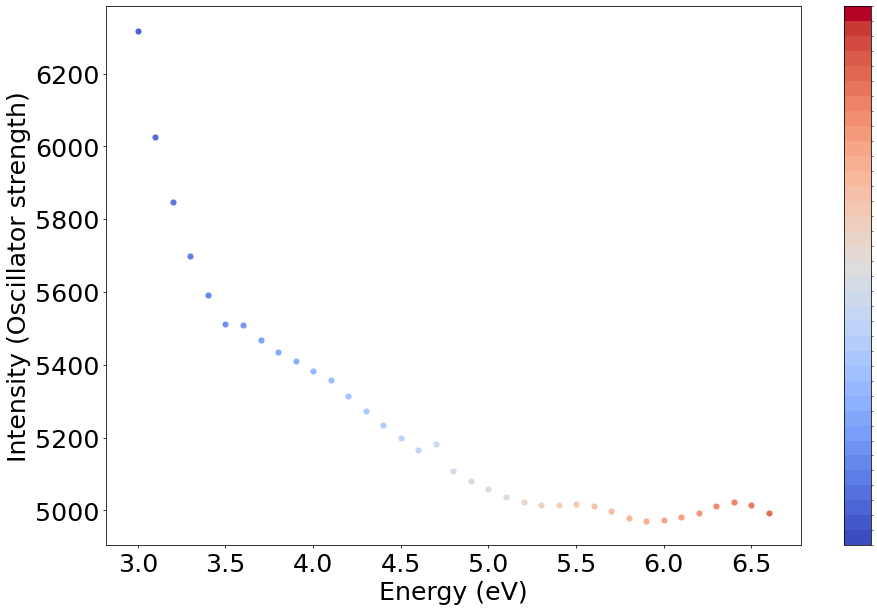

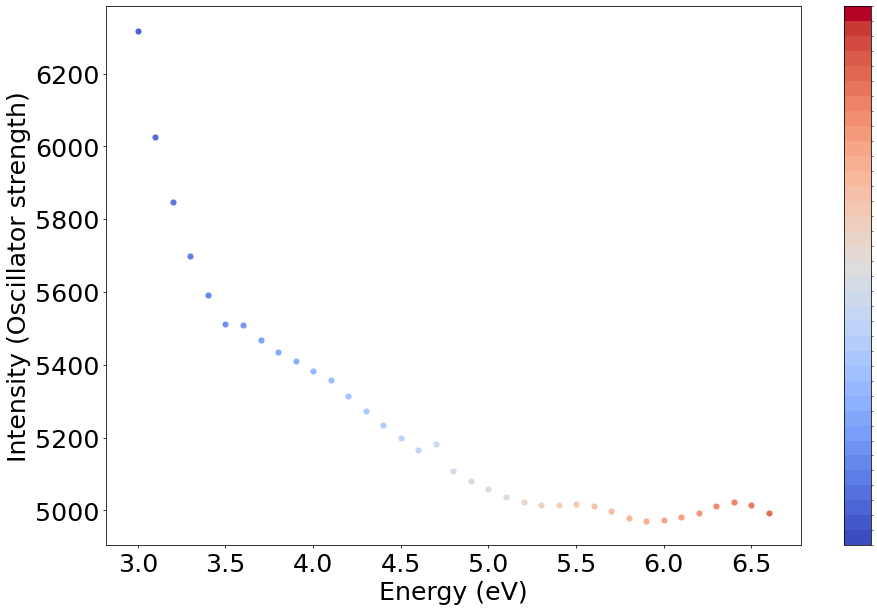

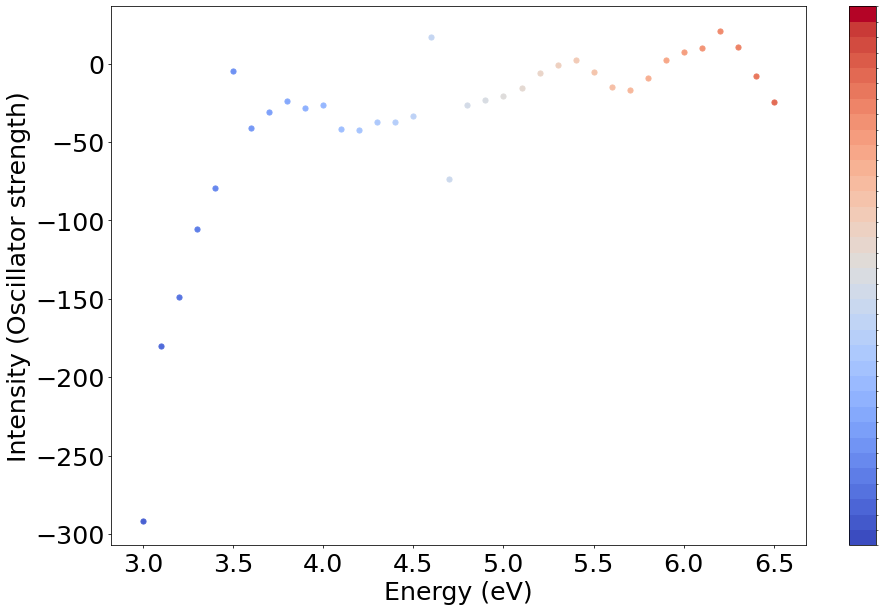

In [76]:
new_df_cutidr = pd.DataFrame({'Distance': [list_suf_cut[cc]/10 for cc in range(len(list_suf_cut))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf_cut))]})
new_df_cutimod = pd.DataFrame({'Distance': [list_suf_cut[cc]/10 for cc in range(len(list_suf_cut))], \
 #'Intensity': [math.log(new_df_cutidr.iloc[cc]['Intensity']) \
 'Intensity': [(new_df_cutidr.iloc[cc]['Intensity']) \
            for cc in range(len(list_suf_cut))]})
new_df_cutidelta = pd.DataFrame({'Distance': [list_suf_cut[cc]/10 for cc in range(len(list_suf_cut)-1)], \
 'Intensity': [(new_df_cutimod.iloc[cc+1]['Intensity'] - new_df_cutimod.iloc[cc]['Intensity']) \
            for cc in range(len(list_suf_cut)-1)]})
neww_df_cutidr = [new_df_cutidr.iloc[ii] for ii in range(len(list_suf_cut))]
neww_df_cutimod = [new_df_cutimod.iloc[ii] for ii in range(len(list_suf_cut))]
neww_df_cutidelta = [new_df_cutidelta.iloc[ii] for ii in range(len(list_suf_cut)-1)]
plot_alot_xray(neww_df_cutidr, list_suf_cut, 'Distance', 'Intensity', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_cutimod, list_suf_cut, 'Distance', 'Intensity', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_cutidelta, list_suf_cut[:-1], 'Distance', 'Intensity', dpi=70, markersize=5.3,
              plotsvg=True, nameplt='deltaE_zone1_2.svg')


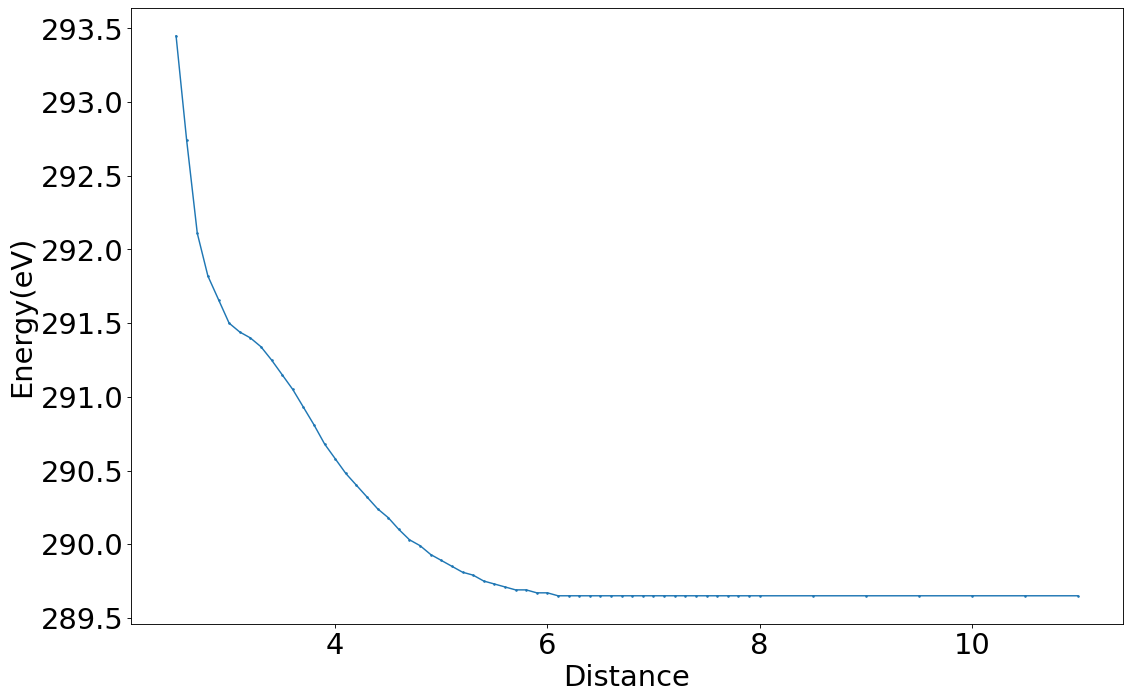

In [77]:
new_df_4 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
new_df_5 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [1/global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})

label_name = [str(ii/10)+'A' for ii in list_suf]
x_arg='Distance'
y_arg='Energy'
figsize=(16, 10)
dpi=80
linestyle='-'
marker='o'
linewidth=1.3
markersize=1.3
colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(new_df)))
#    else:
#        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)
#n1.plot(x_arg, y_arg, data=new_df_5, linestyle=linestyle, marker=marker, linewidth=linewidth, \
#                markersize=markersize, label=label_name)
n1.plot(x_arg, y_arg, data=new_df_4, linestyle=linestyle, marker=marker, linewidth=linewidth, \
                markersize=markersize, label=label_name)
plt.xlabel('Distance')
plt.ylabel('Energy(eV)')
#plt.legend(loc='upper left');
plt.show()

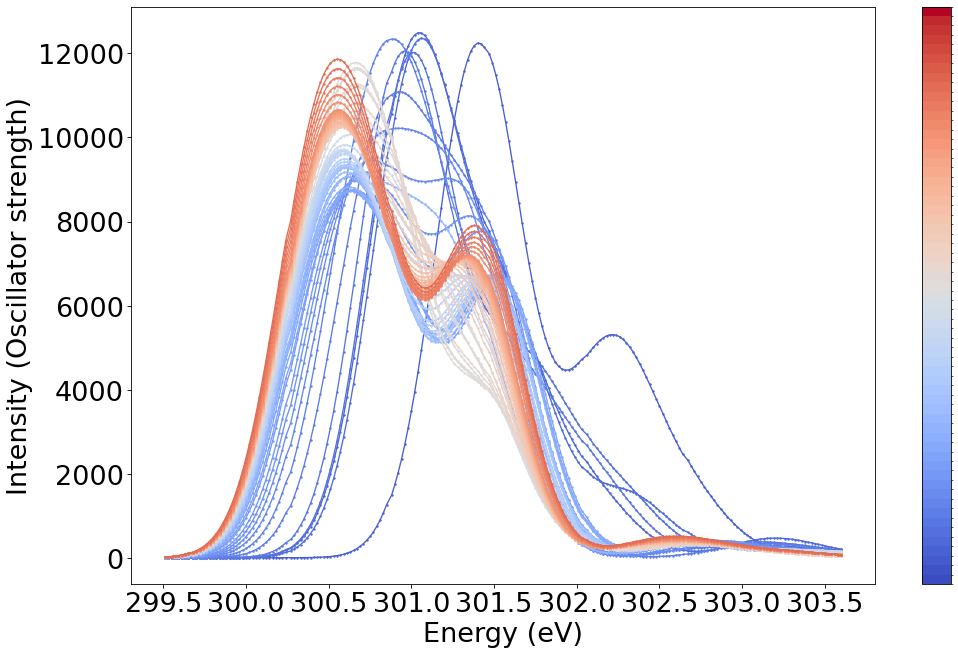

In [78]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=75,\
         xlmt=True, xmin=299.5, xmax=303.6)
#plt.savefig("total_predge_region2.svg")

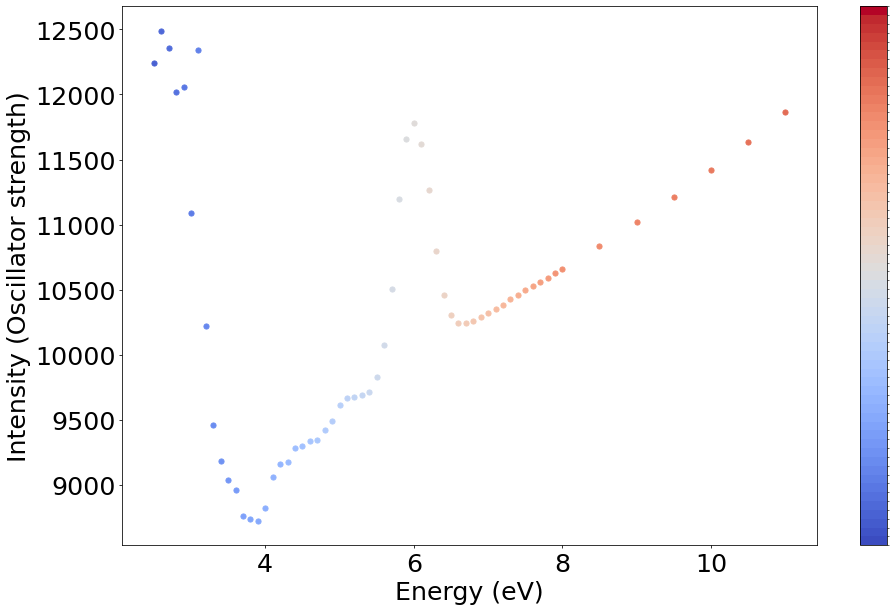

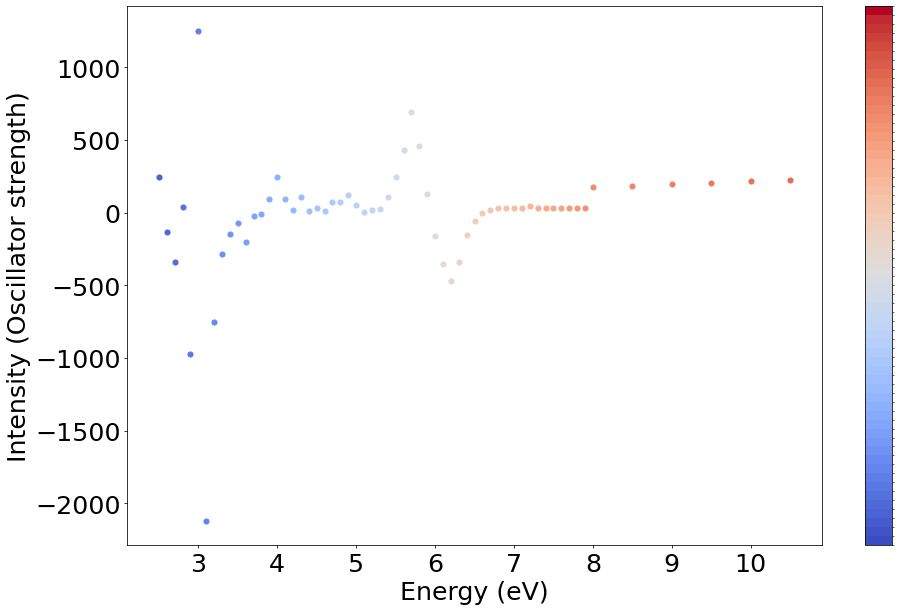

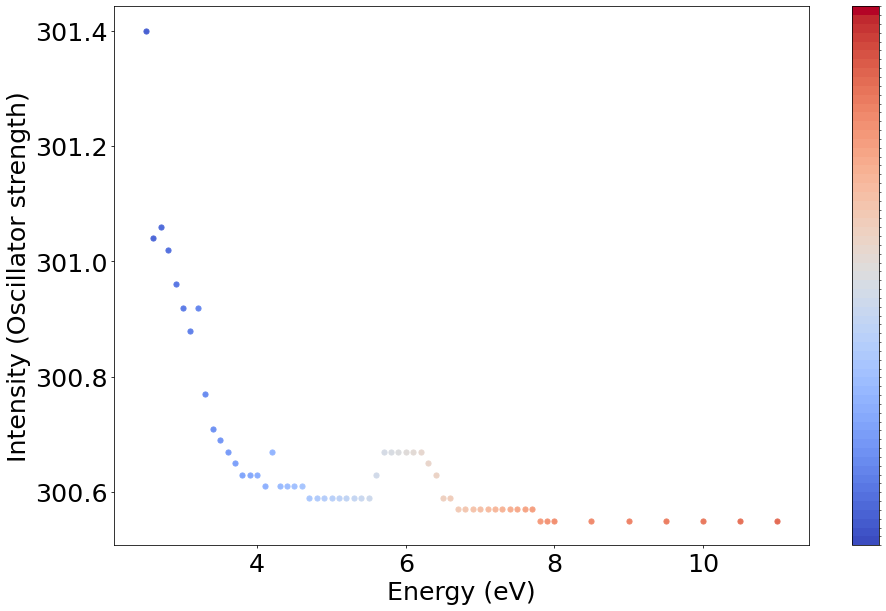

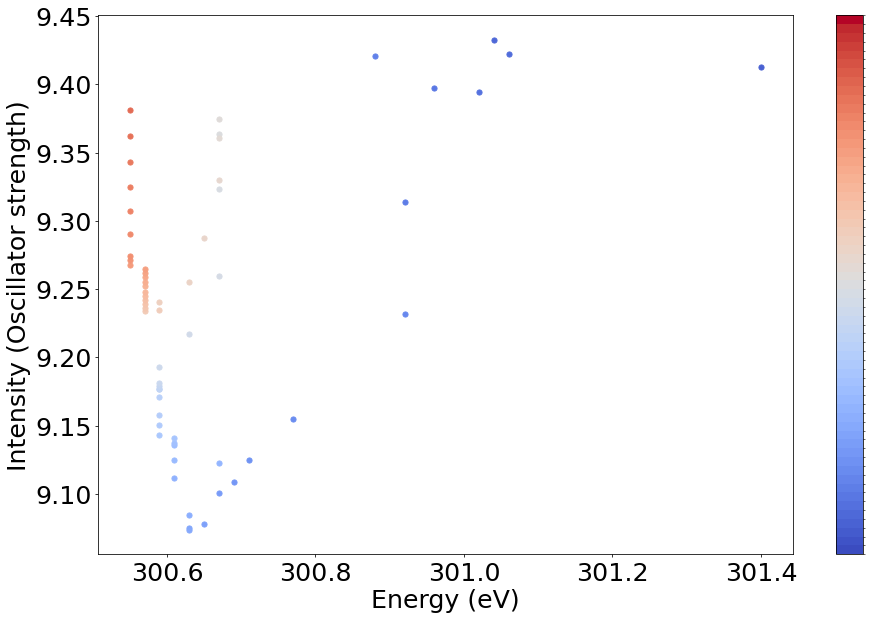

In [79]:
global_name_cut_1 = [getting_max_int(globals()['fy_%s' % str(ii)], 299.5, 303) \
               for ii in list_suf]
new_df_i = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})

new_df_idelta = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf)-1)], \
 'Intensity': [(new_df_i.iloc[cc+1]['Intensity']-new_df_i.iloc[cc]['Intensity']) for cc in range(len(list_suf)-1)]})
# 'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})
new_df_e = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
# 'Energy': [1/math.exp(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})
new_df_ei = pd.DataFrame({'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) \
                                        for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})

neww_df_i = [new_df_i.iloc[ii] for ii in range(len(list_suf))]
neww_df_idelta = [new_df_idelta.iloc[ii] for ii in range(len(list_suf)-1)]
neww_df_e = [new_df_e.iloc[ii] for ii in range(len(list_suf))]
neww_df_ei = [new_df_ei.iloc[ii] for ii in range(len(list_suf))]

label_name = [str(ii/10)+'A' for ii in list_suf]

plot_alot_xray(neww_df_i, list_suf, 'Distance', 'Intensity', dpi=70, markersize=5.3)#,\
             # plotsvg=True, nameplt='Ivsdist_predge_region2pt.svg')
plot_alot_xray(neww_df_idelta, list_suf[:-1], 'Distance', 'Intensity', dpi=70, markersize=5.3,
              plotsvg=True, nameplt='deltaI_zone2.svg')
plot_alot_xray(neww_df_e, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3,
              plotsvg=True, nameplt='nodeltaE_zone2.svg')
plot_alot_xray(neww_df_ei, list_suf, 'Energy', 'Intensity', dpi=70, markersize=5.3)


In [80]:
new_suf=list_suf[5:42]
#new_df_i

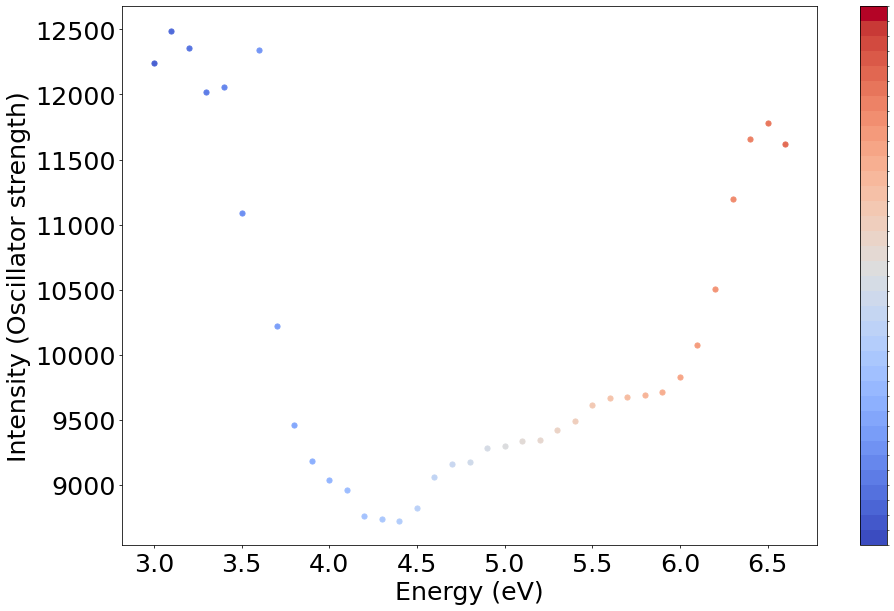

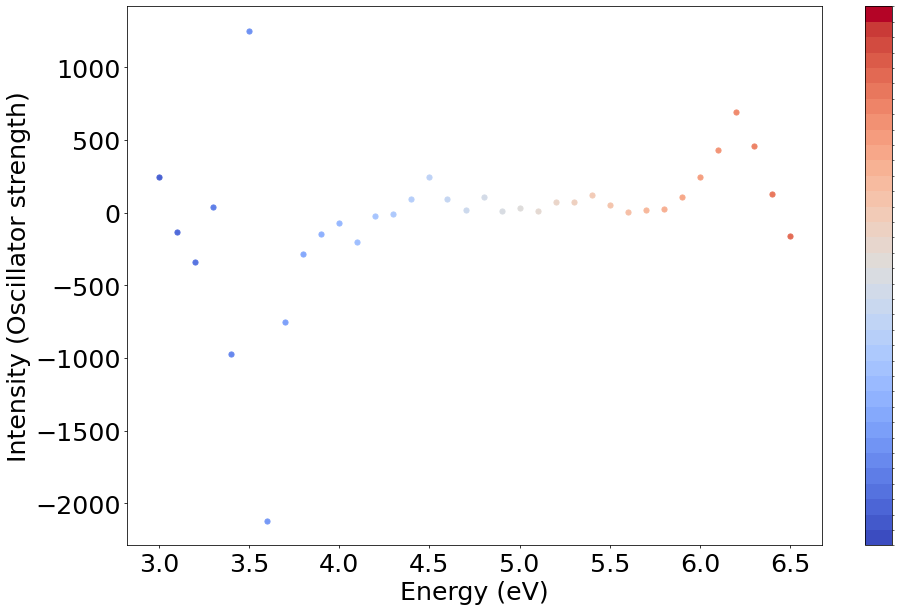

In [81]:
global_name_cut_1 = [getting_max_int(globals()['fy_%s' % str(ii)], 299.5, 303) \
               for ii in list_suf]
new_df_i = pd.DataFrame({'Distance': [new_suf[cc]/10 for cc in range(len(new_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(new_suf))]})

new_df_idelta = pd.DataFrame({'Distance': [new_suf[cc]/10 for cc in range(len(new_suf)-1)], \
 'Intensity': [(new_df_i.iloc[cc+1]['Intensity']-new_df_i.iloc[cc]['Intensity']) \
               for cc in range(len(new_suf)-1)]})
# 'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})
new_df_e = pd.DataFrame({'Distance': [new_suf[cc]/10 for cc in range(len(new_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(new_suf))]})
# 'Energy': [1/math.exp(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})
new_df_ei = pd.DataFrame({'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) \
                                        for cc in range(len(new_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(new_suf))]})

neww_df_i = [new_df_i.iloc[ii] for ii in range(len(new_suf))]
neww_df_idelta = [new_df_idelta.iloc[ii] for ii in range(len(new_suf)-1)]
neww_df_e = [new_df_e.iloc[ii] for ii in range(len(new_suf))]
neww_df_ei = [new_df_ei.iloc[ii] for ii in range(len(new_suf))]

label_name = [str(ii/10)+'A' for ii in list_suf]

plot_alot_xray(neww_df_i, new_suf, 'Distance', 'Intensity', dpi=70, markersize=5.3)#,\
             # plotsvg=True, nameplt='Ivsdist_predge_region2pt.svg')
plot_alot_xray(neww_df_idelta, new_suf[:-1], 'Distance', 'Intensity', dpi=70, markersize=5.3)


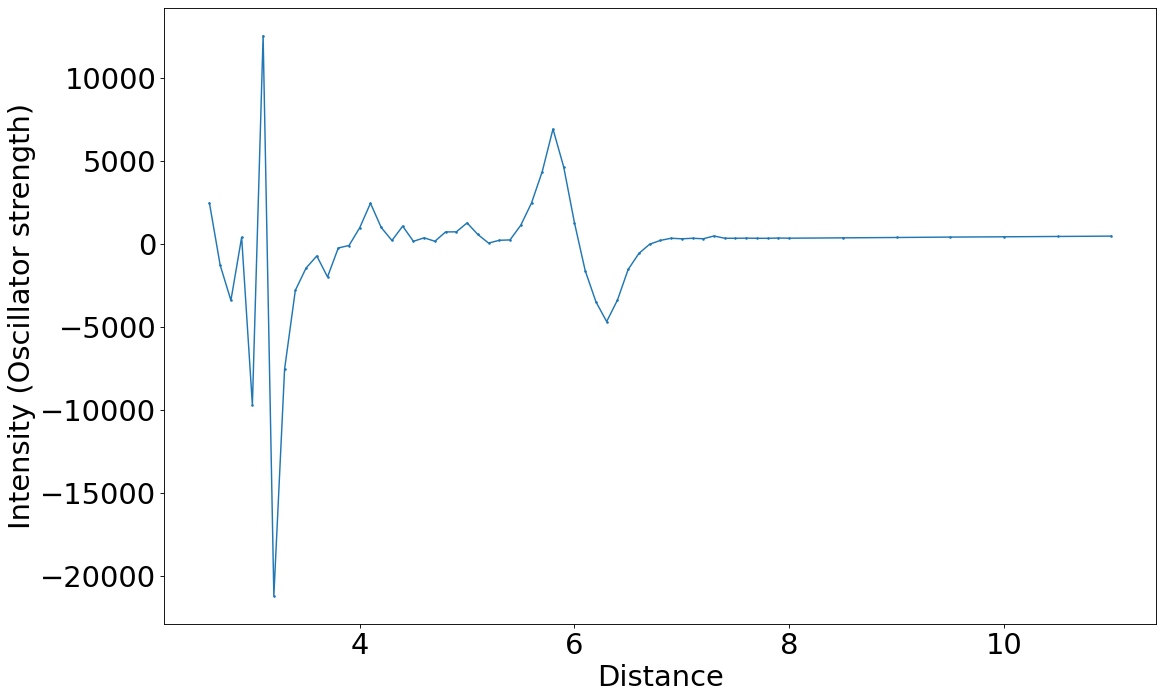

In [82]:
new2_df = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})
new2_df_2 = pd.DataFrame({'Distance': [list_suf[cc+1]/10 for cc in range(len(list_suf)-1)], \
 'Intensity': [(global_name_cut_1[cc+1]['Intensity'] - \
                global_name_cut_1[cc]['Intensity'])/((list_suf[cc+1] - list_suf[cc])/10) for cc in range(len(list_suf)-1)]})


label_name = [str(ii/10)+'A' for ii in list_suf]
x_arg='Distance'
y_arg='Intensity'
figsize=(16, 10)
dpi=80
linestyle='-'
marker='o'
linewidth=1.3
markersize=1.3
colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(new_df)))
#    else:
#        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)
n1.plot(x_arg, y_arg, data=new2_df_2, linestyle=linestyle, marker=marker, linewidth=linewidth, \
                markersize=markersize, label=label_name)
#n1.plot(x_arg, y_arg, data=new2_df, linestyle=linestyle, marker=marker, linewidth=linewidth, \
#                markersize=markersize, label=label_name)
plt.xlabel('Distance')
plt.ylabel('Intensity (Oscillator strength)')
#plt.legend(loc='upper left');
plt.show()

In [83]:
new2_df_2

Distance    Intensity
0        2.6  2444.479400
1        2.7 -1295.974282
2        2.8 -3414.860647
3        2.9   382.175804
4        3.0 -9695.768360
..       ...          ...
56       9.0   370.375828
57       9.5   394.631232
58      10.0   412.052838
59      10.5   432.294806
60      11.0   453.344050

[61 rows x 2 columns]

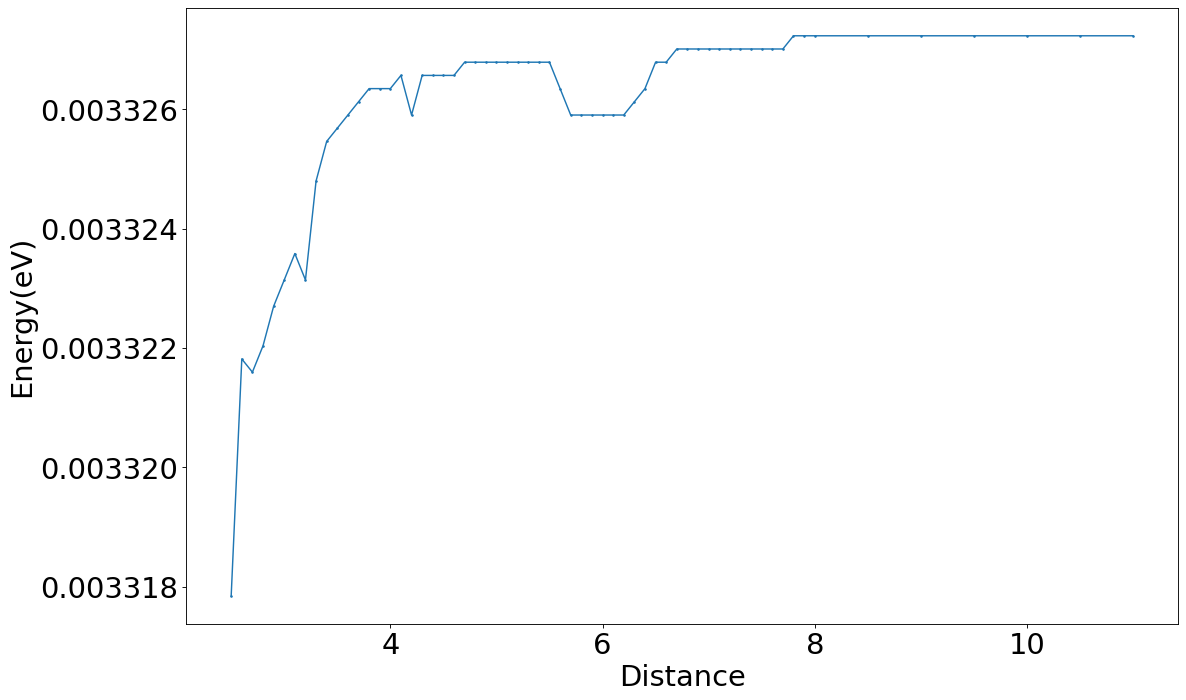

In [84]:
new2_df_3 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
new2_df_4 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [1/global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})

label_name = [str(ii/10)+'A' for ii in list_suf]
x_arg='Distance'
y_arg='Energy'
figsize=(16, 10)
dpi=80
linestyle='-'
marker='o'
linewidth=1.3
markersize=1.3
colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(new_df)))
#    else:
#        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)
#n1.plot(x_arg, y_arg, data=new2_df_3, linestyle=linestyle, marker=marker, linewidth=linewidth, \
#                markersize=markersize, label=label_name)
n1.plot(x_arg, y_arg, data=new2_df_4, linestyle=linestyle, marker=marker, linewidth=linewidth, \
                markersize=markersize, label=label_name)
plt.xlabel('Distance')
plt.ylabel('Energy(eV)')
#plt.legend(loc='upper left');
plt.show()

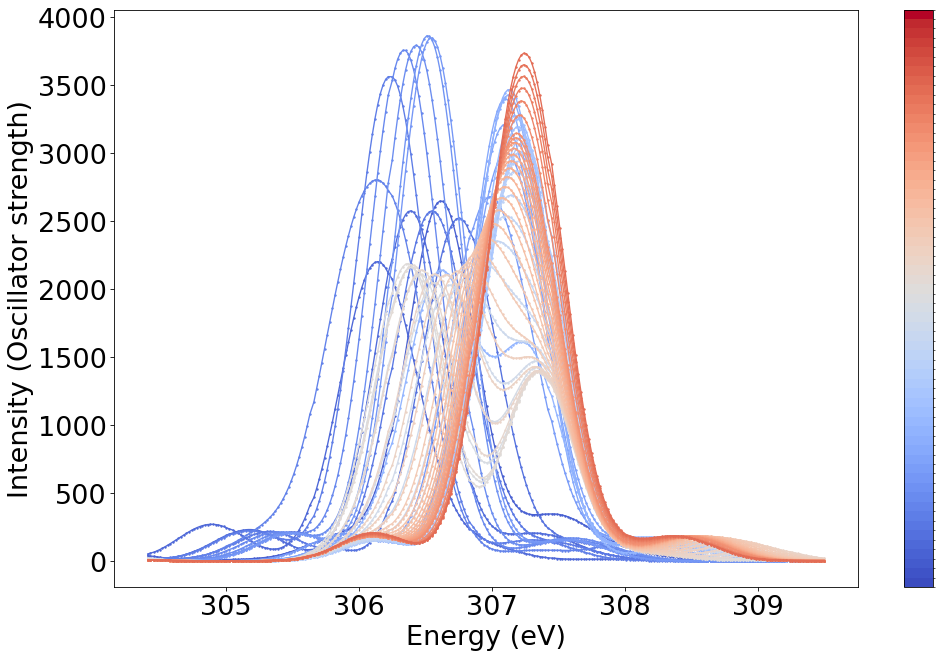

In [85]:
global_name = [globals()['fy_%s' % str(ii)] for ii in list_suf] #creating list of pd.data frame names
label_name = [str(ii/10)+'A' for ii in list_suf] 
plot_alot_xray(global_name, list_suf, 'Energy', 'Intensity', dpi=75,\
         xlmt=True, xmin=304.4, xmax=309.5)

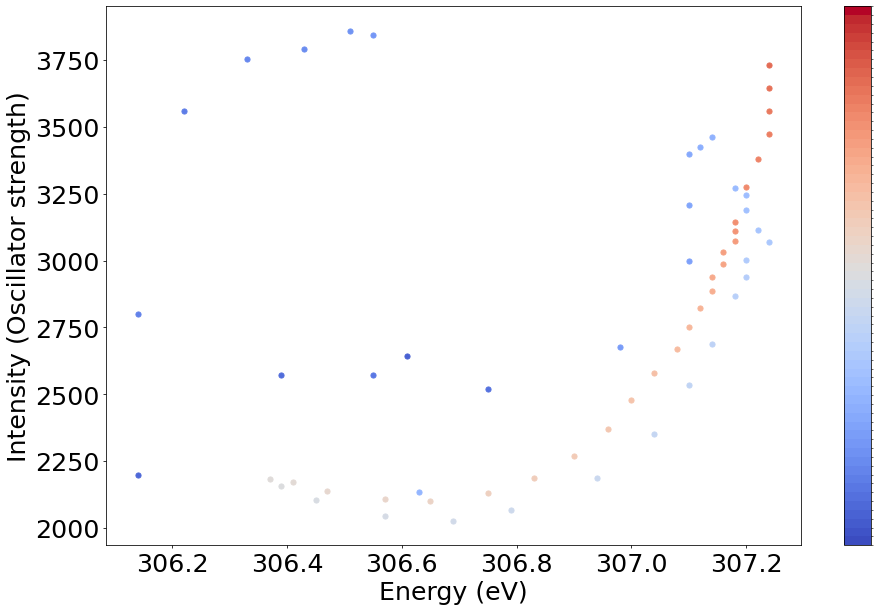

In [86]:
global_name_cut_1 = [getting_max_int(globals()['fy_%s' % str(ii)], 305, 309) \
               for ii in list_suf]
label_name = [str(ii/10)+'A' for ii in list_suf]
plot_alot_xray(global_name_cut_1, list_suf, 'Energy', 'Intensity', dpi=70, markersize=5.3\
              )# xlmt=True, xmin=288.5, xmax=296)

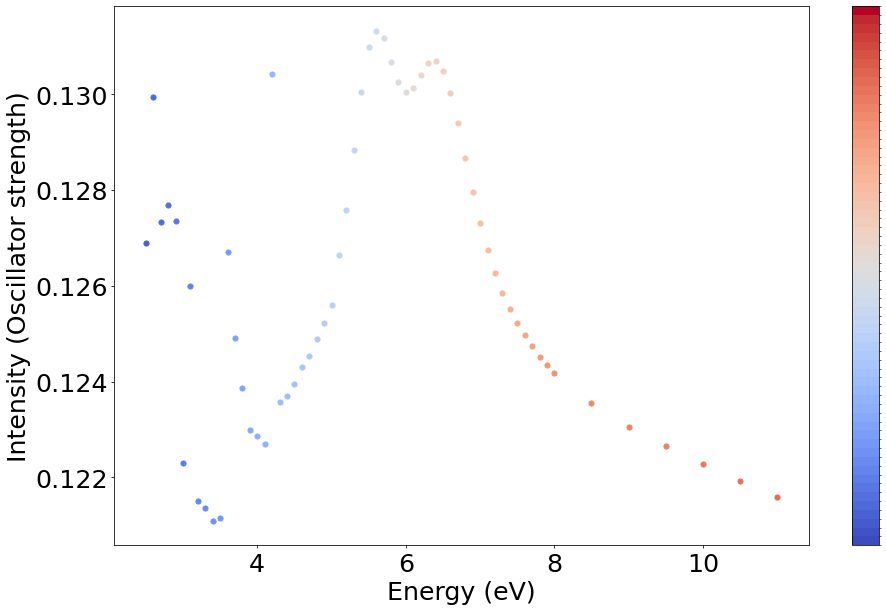

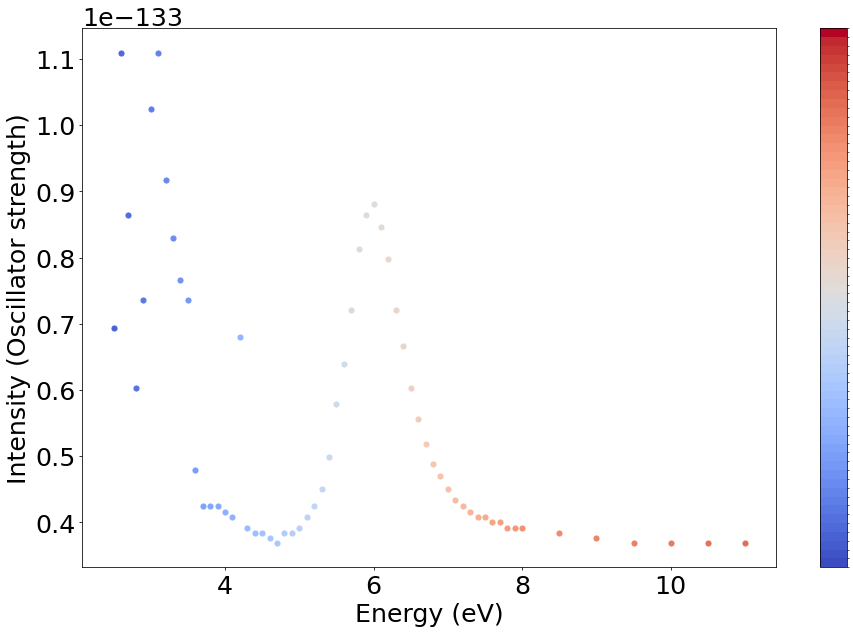

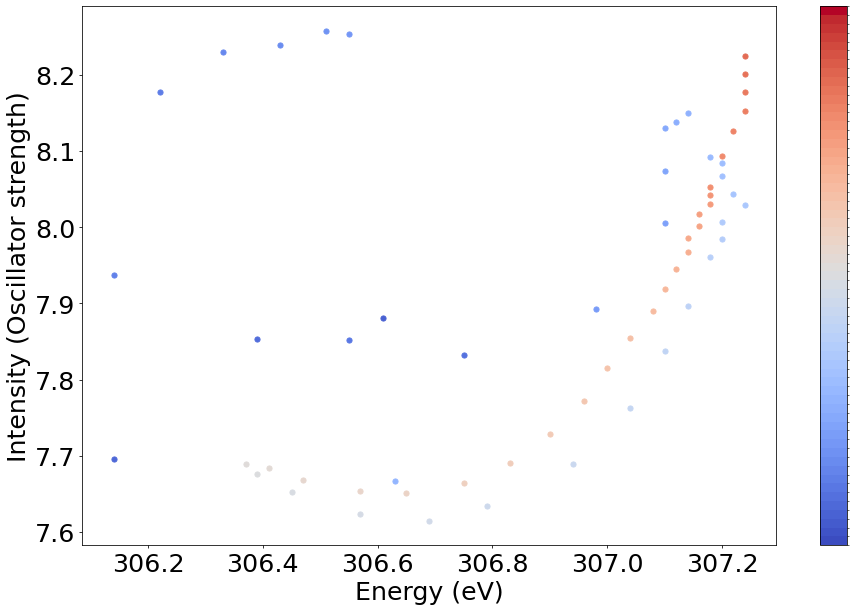

In [87]:
global_name_cut_1 = [getting_max_int(globals()['fy_%s' % str(ii)], 305, 309) \
               for ii in list_suf]
new_df_i = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [1/math.log(global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})
new_df_e = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [1/math.exp(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})

new_df_ei = pd.DataFrame({'Intensity': [math.log(global_name_cut_1[cc]['Intensity']) \
                                        for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})

neww_df_i = [new_df_i.iloc[ii] for ii in range(len(list_suf))]
neww_df_e = [new_df_e.iloc[ii] for ii in range(len(list_suf))]
neww_df_ei = [new_df_ei.iloc[ii] for ii in range(len(list_suf))]

label_name = [str(ii/10)+'A' for ii in list_suf]

plot_alot_xray(neww_df_i, list_suf, 'Distance', 'Intensity', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_e, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_ei, list_suf, 'Energy', 'Intensity', dpi=70, markersize=5.3)

#label_name = [str(ii/10)+'A' for ii in list_suf]
#plot_alot_xray(global_name_cut_1, list_suf, 'Energy', 'Intensity', dpi=75, markersize=5.3\
#              )# xlmt=True, xmin=288.5, xmax=296)

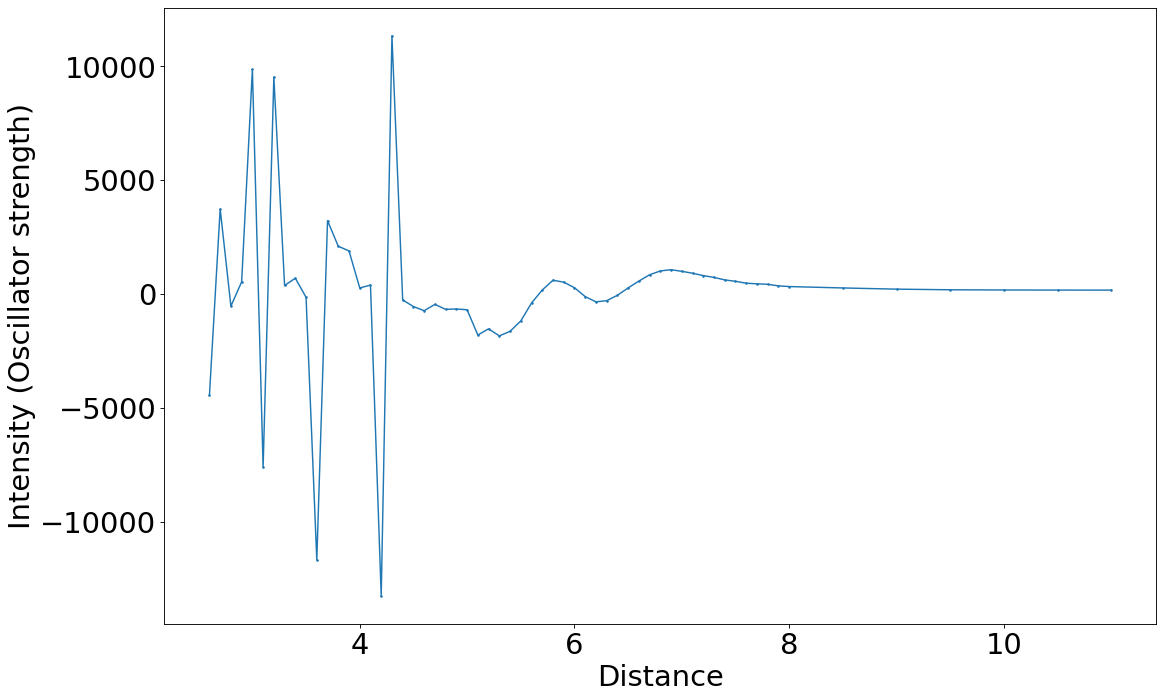

In [88]:
new3_df = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})
new3_df_2 = pd.DataFrame({'Distance': [list_suf[cc+1]/10 for cc in range(len(list_suf)-1)], \
 'Intensity': [(global_name_cut_1[cc+1]['Intensity'] - \
                global_name_cut_1[cc]['Intensity'])/((list_suf[cc+1] - list_suf[cc])/10) for cc in range(len(list_suf)-1)]})


label_name = [str(ii/10)+'A' for ii in list_suf]
x_arg='Distance'
y_arg='Intensity'
figsize=(16, 10)
dpi=80
linestyle='-'
marker='o'
linewidth=1.3
markersize=1.3
colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(new_df)))
#    else:
#        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)
n1.plot(x_arg, y_arg, data=new3_df_2, linestyle=linestyle, marker=marker, linewidth=linewidth, \
                markersize=markersize, label=label_name)
#n1.plot(x_arg, y_arg, data=new3_df, linestyle=linestyle, marker=marker, linewidth=linewidth, \
#                markersize=markersize, label=label_name)
plt.xlabel('Distance')
plt.ylabel('Intensity (Oscillator strength)')
#plt.legend(loc='upper left');
plt.show()

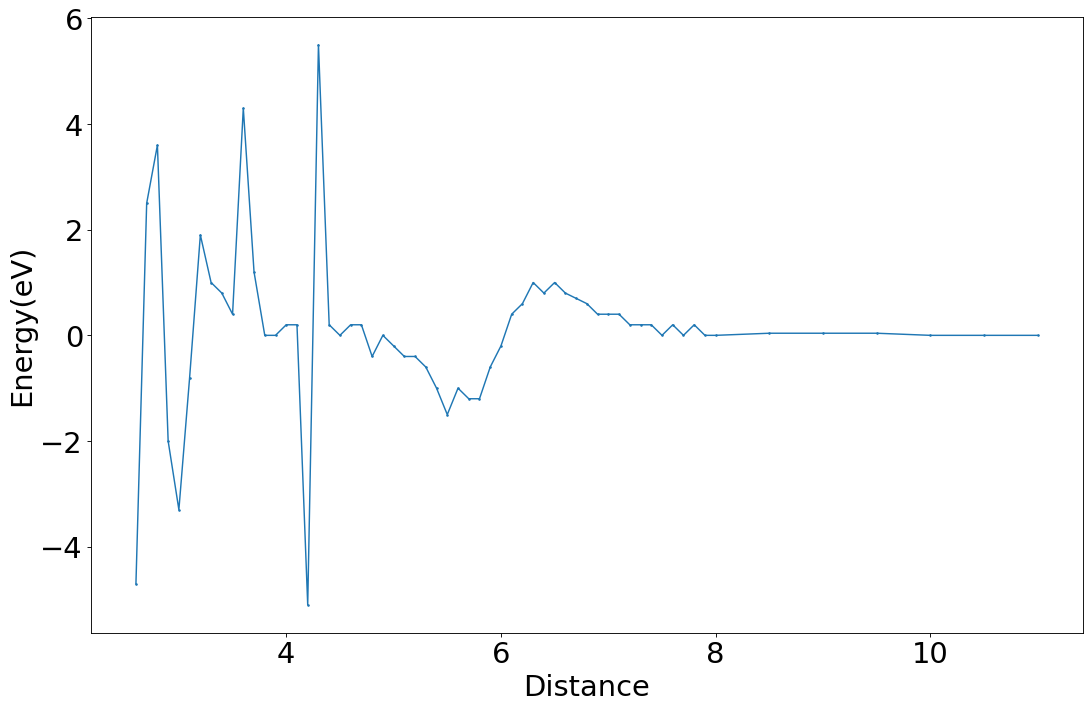

In [89]:
new3_df_3 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
new3_df_4 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [1/global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
new3_df_5 = pd.DataFrame({'Distance': [list_suf[cc+1]/10 for cc in range(len(list_suf)-1)], \
 'Energy': [(global_name_cut_1[cc+1]['Energy'] - \
                global_name_cut_1[cc]['Energy'])/((list_suf[cc+1] - list_suf[cc])/10) for cc in range(len(list_suf)-1)]})


label_name = [str(ii/10)+'A' for ii in list_suf]
x_arg='Distance'
y_arg='Energy'
figsize=(16, 10)
dpi=80
linestyle='-'
marker='o'
linewidth=1.3
markersize=1.3
colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(new_df)))
#    else:
#        colors=matplotlib.pyplot.get_cmap(name='coolwarm')(np.linspace(0.05, 0.85, len(global_name)))
fig = plt.figure(figsize=figsize, dpi=dpi)
n1 = fig.add_subplot(111)
#n1.plot(x_arg, y_arg, data=new3_df_3, linestyle=linestyle, marker=marker, linewidth=linewidth, \
#                markersize=markersize, label=label_name)
n1.plot(x_arg, y_arg, data=new3_df_5, linestyle=linestyle, marker=marker, linewidth=linewidth, \
                markersize=markersize, label=label_name)
plt.xlabel('Distance')
plt.ylabel('Energy(eV)')
#plt.legend(loc='upper left');
plt.show()

In [90]:
list_suf = [i for i in range(30,67)]

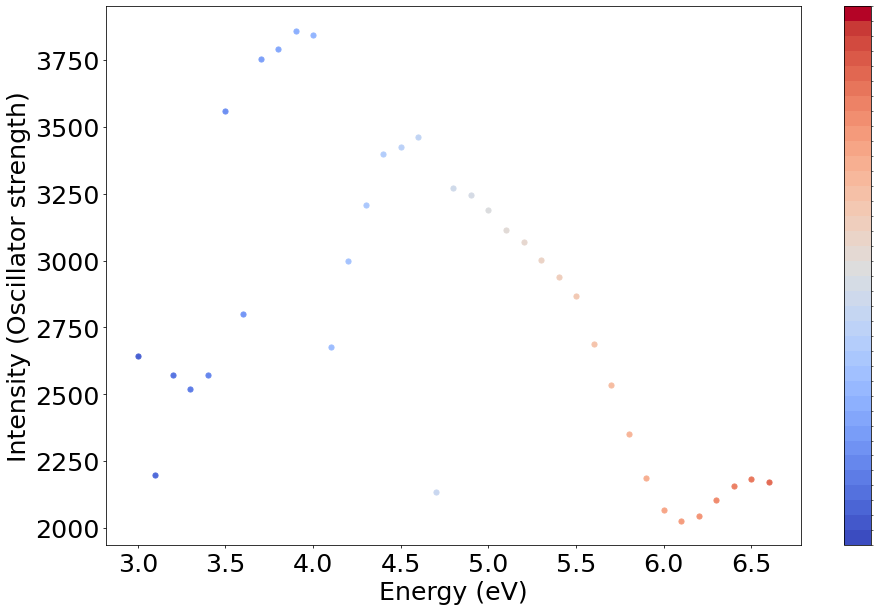

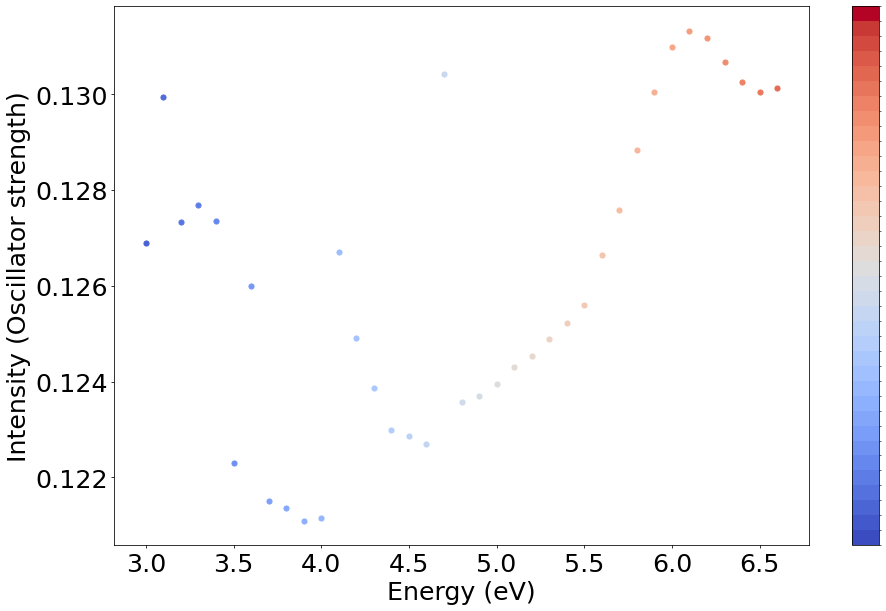

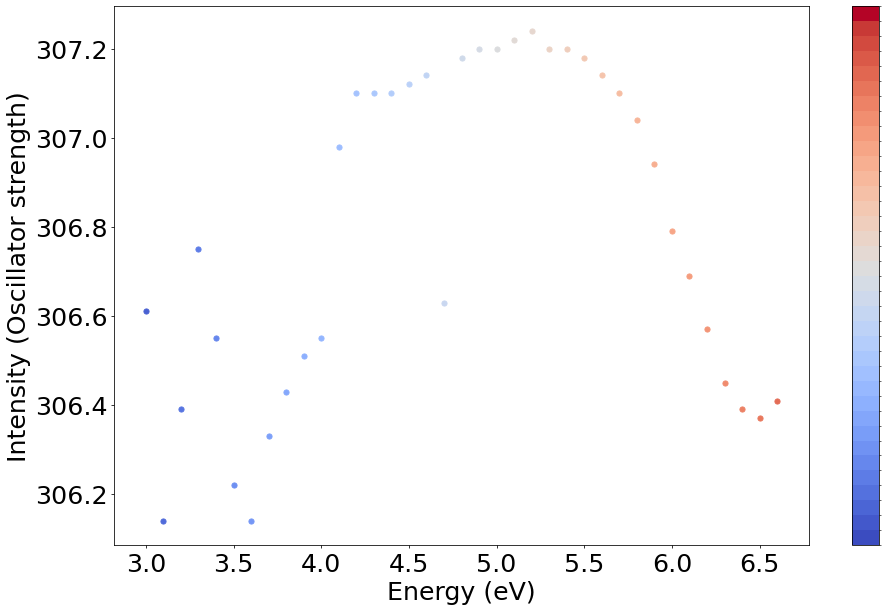

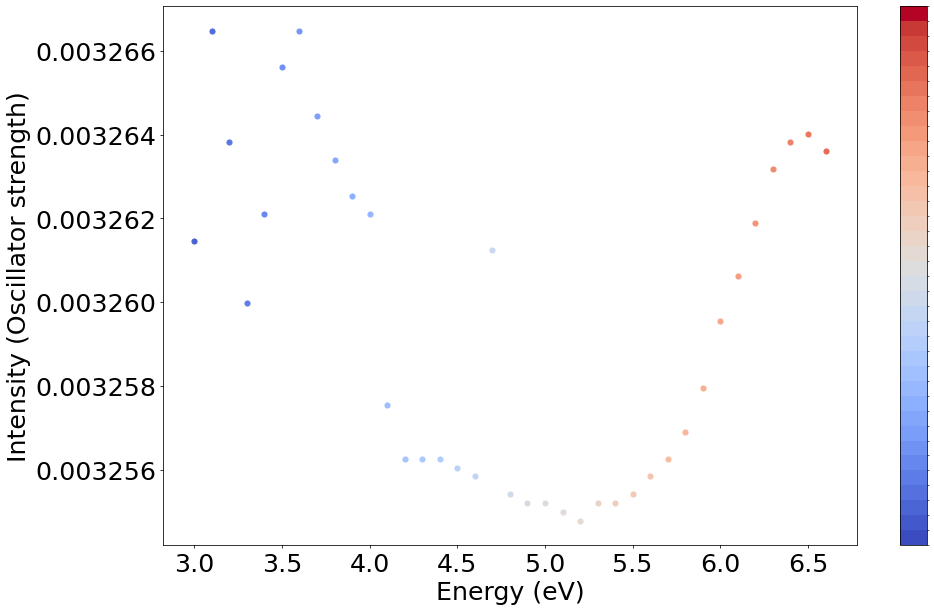

In [91]:
new_df = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [global_name_cut_1[cc]['Intensity'] for cc in range(len(list_suf))]})
new_df_3 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Intensity': [1/math.log(global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})

new_df_4 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy'] for cc in range(len(list_suf))]})
new_df_5 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [1/(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})#favourite one
# 'Energy': [1/math.log(global_name_cut_1[cc]['Energy']) for cc in range(len(list_suf))]})#favourite one

new_df_6 = pd.DataFrame({'Distance': [list_suf[cc]/10 for cc in range(len(list_suf))], \
 'Energy': [global_name_cut_1[cc]['Energy']+(1/global_name_cut_1[cc]['Intensity']) for cc in range(len(list_suf))]})

neww_df = [new_df.iloc[ii] for ii in range(len(list_suf))]
neww_df_2 = [new_df_3.iloc[ii] for ii in range(len(list_suf))]
neww_df_3 = [new_df_4.iloc[ii] for ii in range(len(list_suf))]
neww_df_4 = [new_df_5.iloc[ii] for ii in range(len(list_suf))]
#neww_df_5 = [new_df_6.iloc[ii] for ii in range(len(list_suf))]
label_name = [str(ii/10)+'A' for ii in list_suf]
plot_alot_xray(neww_df, list_suf, 'Distance', 'Intensity', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_2, list_suf, 'Distance', 'Intensity', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_3, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3)
plot_alot_xray(neww_df_4, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3)
#plot_alot_xray(neww_df_5, list_suf, 'Distance', 'Energy', dpi=70, markersize=5.3)